# Lending Club Loan - Predicting Charged-Off

# Overview of the Notebook:

Loading and inspecting the Dataset:

Target variable Analysis:

EDA & Pre-processing:

Feature Engineering:

Model Building:

Model Performance Evaluation:

Business Insights:

# Let's Start

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import kstest
import statsmodels.api as sm
### Importing Date & Time util modules
from dateutil.parser import parse


In [7]:
df = pd.read_csv(r"C:\Users\hp\Downloads\archive\lending_club_loan_two.csv", index_col=False)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


Missing Value - Calculator

In [8]:
def missingValue(df):
    total_null = df.isnull().sum().sort_values(ascending = False)
    percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = False)
    print("Total records = ", df.shape[0])

    md = pd.concat([total_null,percent.round(2)],axis=1,keys=['Total Missing','In Percent'])
    return md

Numerical Variable Analysis:

In [9]:
def plot_num_var(df,colname,name):    
    # Visualizing our dependent variable and Skewness
    fig , (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
    fig.set_facecolor("lightgrey")

    sns.boxplot(y= colname,x='loan_status',data=df,ax=ax1)
    ax1.set_ylabel(name, fontsize=14,family = "Comic Sans MS")
    ax1.set_xlabel('Count', fontsize=14,family = "Comic Sans MS")
    ax1.set_title(name + ' by Loan Status', fontweight="bold",fontsize=15,family = "Comic Sans MS")

    sns.distplot(df[colname],color='y',ax=ax2,kde=True)
    
    mean = df[colname].mean()
    median = df[colname].median()
    mode = df[colname].mode()[0]
    
    label_mean= ("Mean :  {:.2f}".format(mean))
    label_median = ("Median :  {:.2f}".format(median))
    label_mode = ("Mode :  {:.2f}".format(mode))
    
    ax2.set_title("Distribution of " + name, fontweight="bold",fontsize=15,family = "Comic Sans MS")
    ax2.set_ylabel('Density', fontsize=12,family = "Comic Sans MS")
    ax2.set_xlabel(name, fontsize=12,family = "Comic Sans MS")
    ax2.axvline(mean,color="g",label=label_mean)
    ax2.axvline(median,color="b",label=label_median)
    ax2.axvline(mode,color="r",label=label_mode)
    ax2.legend()
    plt.show()

Categorical variables:

In [10]:
# Frequency of each feature in percentage.
def count_plt(df, colname, name,width=14,height=14,rotation=0):
    fig = plt.figure(figsize=(width, height))
    fig.set_facecolor("lightgrey")
    string = "Frequency of " + name
    ax = sns.countplot(df[colname], order=sorted(df[colname].unique()), color='#56B4E9',saturation=1)

    plt.xticks(rotation = rotation,fontsize=16,family="Comic Sans MS")
    plt.yticks(fontsize=16,family="Comic Sans MS")
    plt.ylabel(string, fontsize=18,family = "Comic Sans MS")
    plt.xlabel(name, fontsize=18,family = "Comic Sans MS")
    for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [11]:
def stack_bar(df,colname,name):
    cross_tab_pct = pd.crosstab(index=df[colname],
                            columns=df['loan_status'],normalize="index")
    cross_tab = pd.crosstab(index=df[colname],columns=df['loan_status'])
    
    cross_tab_pct.plot(kind='bar', stacked=True, colormap='Wistia', figsize=(10, 6))

    plt.legend(loc="upper right", ncol=2)
    plt.xlabel(name,fontsize=14,family = "Comic Sans MS")
    plt.ylabel("Loan Status",fontsize=14,family = "Comic Sans MS")
    plt.xticks(rotation=0)

    for n, x in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_loc) in zip(cross_tab_pct.loc[x],
                                              cross_tab.loc[x],
                                              cross_tab_pct.loc[x].cumsum()):

            plt.text(x=n - 0.17,y=(y_loc - proportion) + (proportion / 2),
                     s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                     color="black",fontsize=12,fontweight="bold")

    plt.show()

In [12]:
def stack_bar_h(df,colname,name):
    cross_tab_pct = pd.crosstab(index=df[colname],
                            columns=df['loan_status'],normalize="index")
    cross_tab = pd.crosstab(index=df[colname],columns=df['loan_status'])
    
    cross_tab_pct.plot(kind='barh',stacked=True, colormap='Wistia', figsize=(10, 18))

    plt.legend(loc="lower right", ncol=2)
    plt.xlabel(name,fontsize=14,family = "Comic Sans MS")
    plt.ylabel("Loan Status",fontsize=14,family = "Comic Sans MS")
    plt.xticks(rotation=0)

    for n, x in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_loc) in zip(cross_tab_pct.loc[x],cross_tab.loc[x],
                                              cross_tab_pct.loc[x].cumsum()):

            plt.text(x=(y_loc - proportion) + (proportion / 2),y=n - 0.11,
                     s=f'{count}\n({np.round(proportion * 100, 1)}%)', 
                     color="black", fontsize=10,)

    plt.show()

In [13]:
loan_data = pd.read_csv(r"C:\Users\hp\Downloads\archive\lending_club_loan_two.csv")
loan_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


Validating Duplicate Records

In [14]:
loan_data.shape

(396030, 27)

In [15]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

Validating Duplicate Records

In [16]:
loan_data.duplicated().sum()

0

In [17]:
missingValue(loan_data).head(7)

Total records =  396030


,Total Missing,In Percent
mort_acc,37795,9.54
emp_title,22927,5.79
emp_length,18301,4.62
title,1755,0.44
pub_rec_bankruptcies,535,0.14
revol_util,276,0.07
loan_amnt,0,0.00


Inferences

In [18]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [19]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

# Target variable Analysis

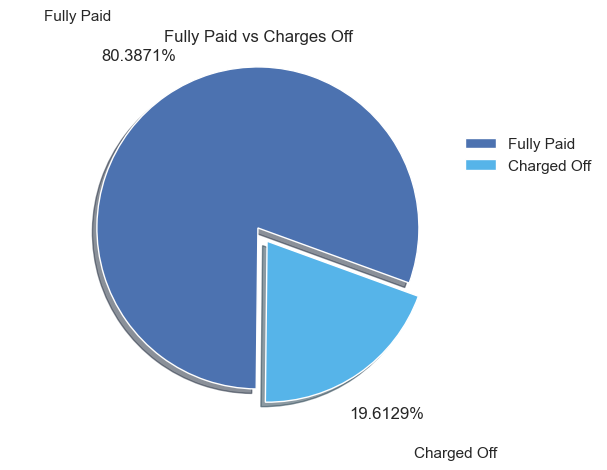

In [20]:
fig, ax = plt.subplots()

labels = ['Fully Paid','Charged Off']
explode=(0.1,0)

loan_status = loan_data["loan_status"].value_counts()

df = pd.DataFrame({'labels': loan_status.index,
                   'values': loan_status.values
                  })
ax.pie(loan_status.values, explode=explode, labels=labels,  
       colors=['b','#56B4E9'], autopct='%1.4f%%', 
       shadow=True, startangle=-20,   
       pctdistance=1.3,labeldistance=1.6)

ax.axis('equal')
ax.set_title("Fully Paid vs Charges Off")
ax.legend(frameon=False, bbox_to_anchor=(1.2,0.8))

Inference

# Pre-Processing & EDA

Numerical Variables

loan_amnt

In [21]:
loan_data[['loan_amnt']].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.0,8000.0,12000.0,20000.0,40000.0


In [22]:
loan_data.groupby(['loan_status'])['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


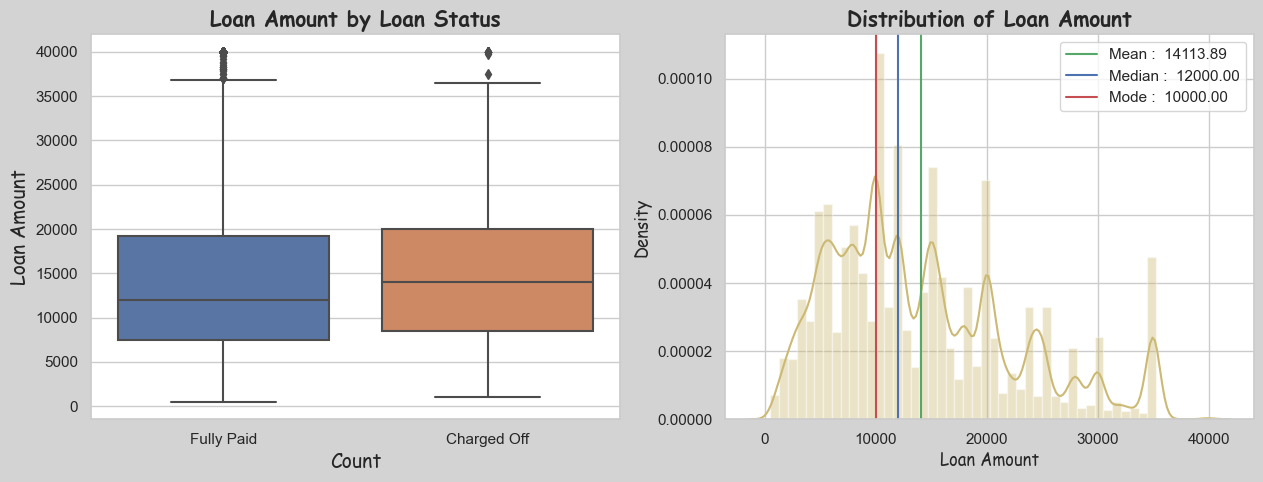

In [23]:
plot_num_var(loan_data,'loan_amnt','Loan Amount')

Inference

Interest Rate

In [24]:
loan_data[['int_rate']].describe().T

,count,mean,std,min,25%,50%,75%,max
int_rate,396030.0,13.6394,4.472157,5.32,10.49,13.33,16.49,30.99


In [25]:
loan_data.groupby(['loan_status'])['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15.882587,4.388135,5.32,12.99,15.61,18.64,30.99
Fully Paid,318357.0,13.092105,4.319105,5.32,9.91,12.99,15.61,30.99


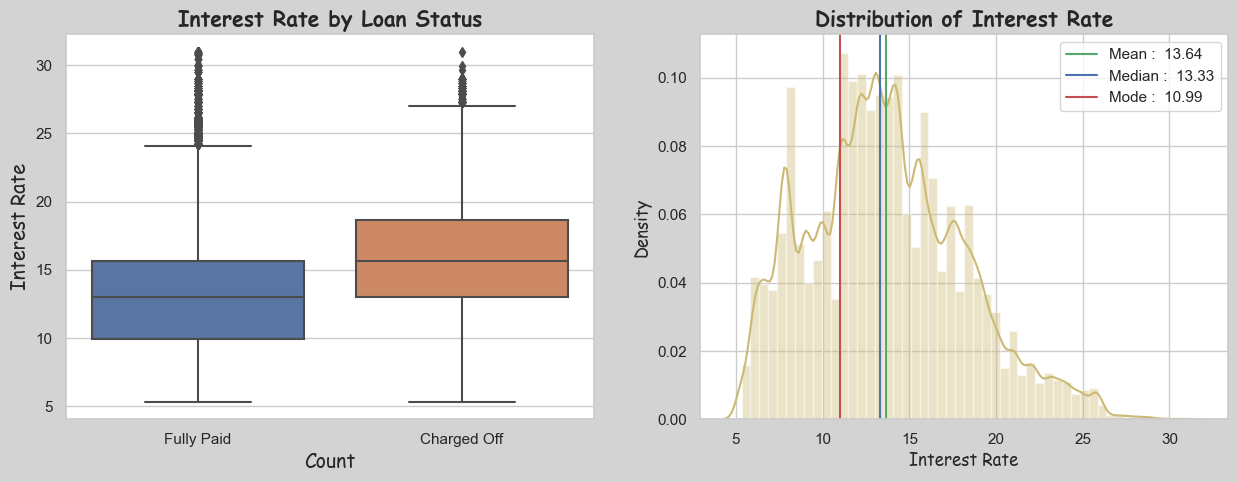

In [26]:
plot_num_var(loan_data,'int_rate','Interest Rate')

Inference

Installment

In [27]:
loan_data[['installment']].describe().T

,count,mean,std,min,25%,50%,75%,max
installment,396030.0,431.849698,250.72779,16.08,250.33,375.43,567.3,1533.81


In [28]:
loan_data.groupby(['loan_status'])['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,452.703110,249.096609,21.62,274.86,399.06,585.67,1527.00
Fully Paid,318357.0,426.761866,250.861622,16.08,244.46,369.51,562.89,1533.81


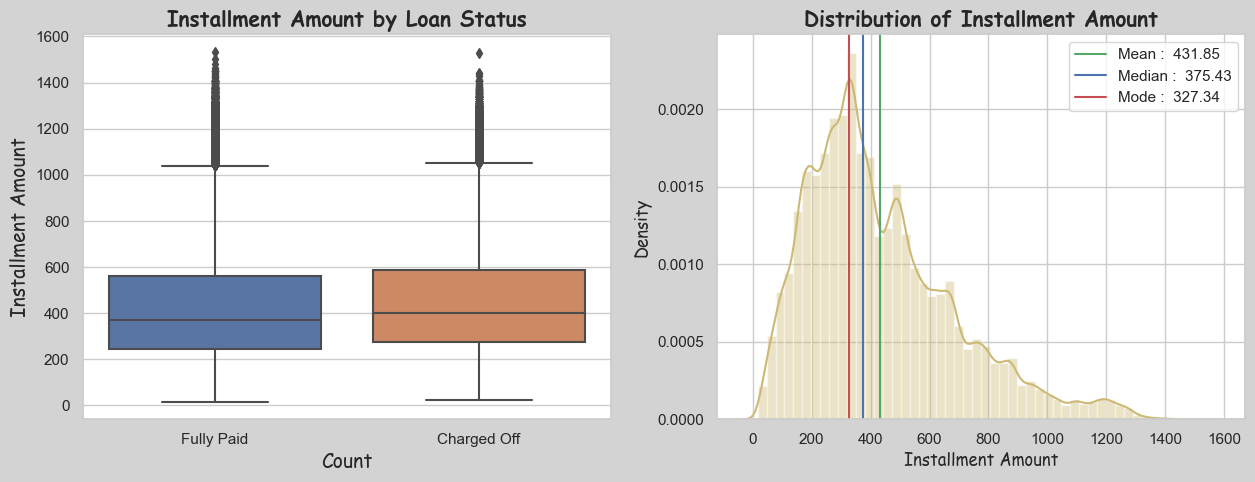

In [29]:
plot_num_var(loan_data,'installment','Installment Amount')

Inference

Annual Income

In [30]:
loan_data[['annual_inc']].describe().T

,count,mean,std,min,25%,50%,75%,max
annual_inc,396030.0,74203.175798,61637.621158,0.0,45000.0,64000.0,90000.0,8706582.0


In [31]:
loan_data.groupby(['loan_status'])['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,67535.537710,58303.457136,0.0,42000.00,59000.0,80000.0,8706582.0
Fully Paid,318357.0,75829.951566,62315.991907,600.0,46050.53,65000.0,90000.0,7600000.0


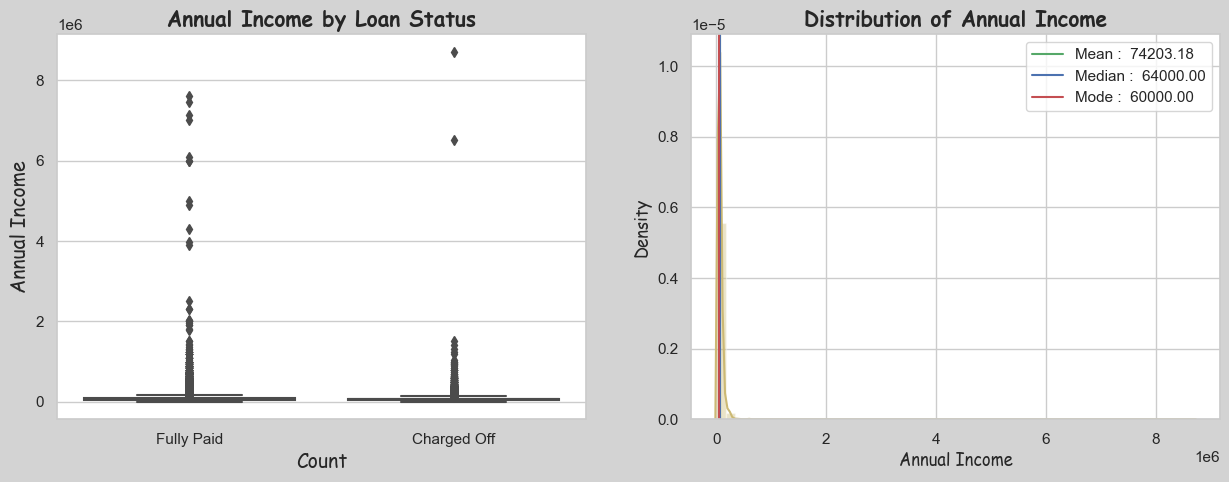

In [32]:
plot_num_var(loan_data,'annual_inc','Annual Income')

Inferences

In [33]:
## trainsforming target variable using numpy.log1p, 
loan_data["annual_inc_ln"] = np.log1p(loan_data["annual_inc"])

In [34]:
loan_data[['annual_inc_ln']].describe().T

,count,mean,std,min,25%,50%,75%,max
annual_inc_ln,396030.0,11.067137,0.5246,0.0,10.71444,11.066654,11.407576,15.97959


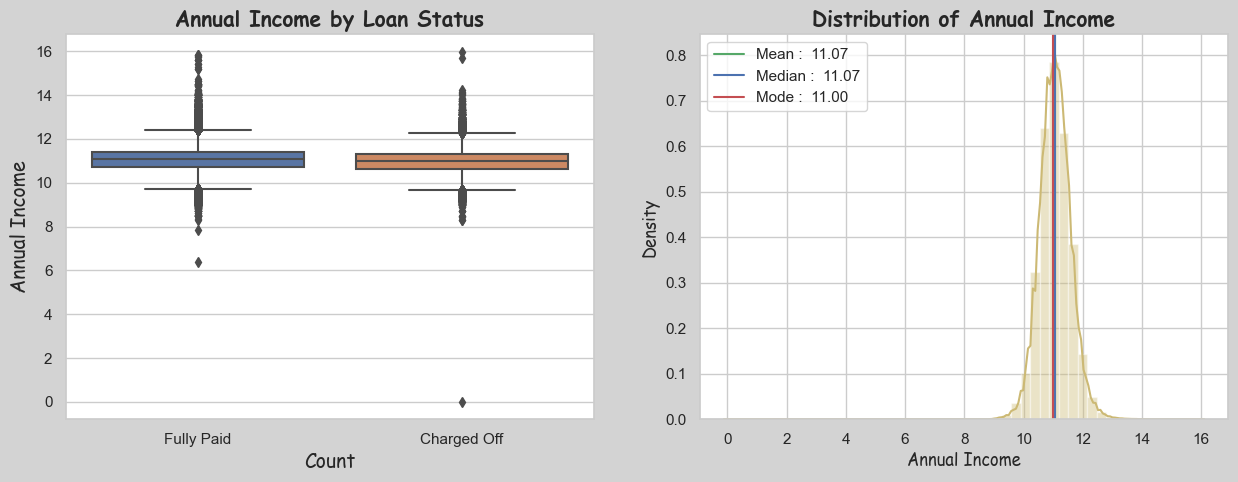

In [35]:
plot_num_var(loan_data,'annual_inc_ln','Annual Income')

In [36]:
 loan_data.groupby(['loan_status'])['annual_inc_ln'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,10.977794,0.517411,0.000000,10.645449,10.985310,11.289794,15.979590
Fully Paid,318357.0,11.088935,0.524034,6.398595,10.737516,11.082158,11.407576,15.843659


In [37]:
77673/loan_data.shape[0]

0.1961290811302174

In [38]:
318357/loan_data.shape[0]

0.8038709188697826

Inference:

Note - To improve the performance of the model we will be removing the outliers using the repetitive process of

training model and detecting and removing outliers

In [39]:
loan_data.drop('annual_inc_ln', axis=1, inplace=True)

DTI:

In [40]:
loan_data[['dti']].describe().T

,count,mean,std,min,25%,50%,75%,max
dti,396030.0,17.379514,18.019092,0.0,11.28,16.91,22.98,9999.0


In [41]:
loan_data.groupby(['loan_status'])['dti'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,19.656346,36.781068,0.0,13.33,19.34,25.55,9999.0
Fully Paid,318357.0,16.824010,8.500979,0.0,10.87,16.34,22.29,1622.0


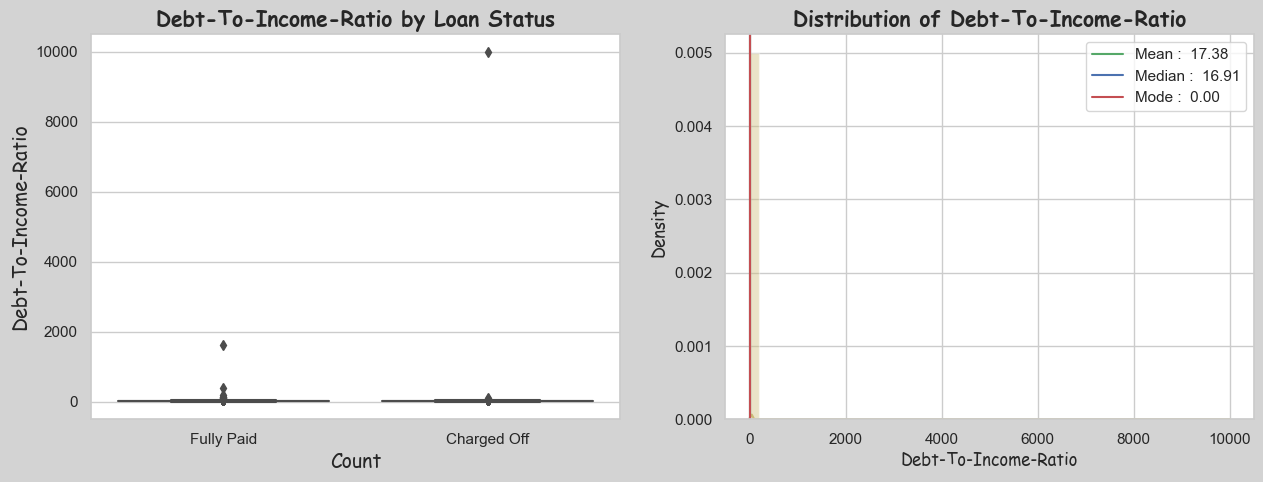

In [42]:
plot_num_var(loan_data,'dti','Debt-To-Income-Ratio')

In [43]:
loan_data.loc[loan_data['dti']>=50, 'loan_status'].value_counts()

Fully Paid     26
Charged Off     9
Name: loan_status, dtype: int64

In [44]:
9/35

0.2571428571428571

In [45]:
loan_data.loc[loan_data['dti']<=10, 'loan_status'].value_counts()

Fully Paid     68242
Charged Off    10850
Name: loan_status, dtype: int64

In [46]:
10850/(68242+10850)

0.13718201588024073

Inferences:

Open Credit Lines

In [47]:
loan_data[['open_acc']].describe().T

,count,mean,std,min,25%,50%,75%,max
open_acc,396030.0,11.311153,5.137649,0.0,8.0,10.0,14.0,90.0


In [48]:
loan_data['open_acc'].nunique()

61

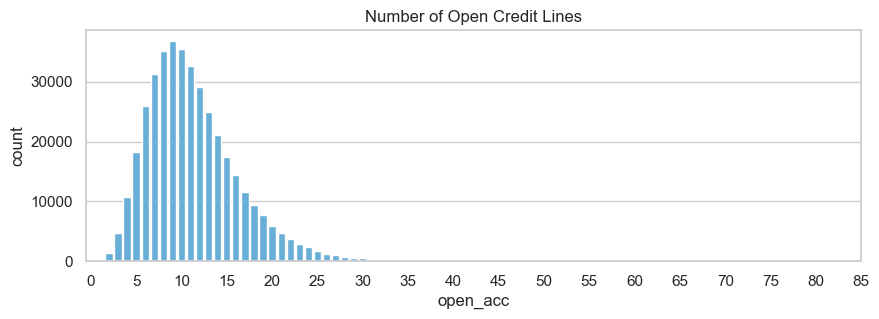

In [49]:
plt.figure(figsize=(10,3),dpi=100)
fig.set_facecolor("lightgrey")
sns.countplot(loan_data['open_acc'], order=sorted(loan_data['open_acc'].unique()), color='#56B4E9')
a, b = plt.xticks(np.arange(0, 90, 5), np.arange(0, 90, 5))
plt.title('Number of Open Credit Lines')
plt.show()

Public Records(pub_rec)

In [50]:
loan_data[['pub_rec']].describe().T

,count,mean,std,min,25%,50%,75%,max
pub_rec,396030.0,0.178191,0.530671,0.0,0.0,0.0,0.0,86.0


In [51]:
loan_data['pub_rec'].value_counts().head(7)

0.0    338272
1.0     49739
2.0      5476
3.0      1521
4.0       527
5.0       237
6.0       122
Name: pub_rec, dtype: int64

In [52]:
loan_data.loc[loan_data['pub_rec']>=1, 'loan_status'].value_counts()

Fully Paid     45424
Charged Off    12334
Name: loan_status, dtype: int64

In [53]:
12334/(12334+45424)

0.21354617542158663

In [54]:
loan_data.loc[loan_data['pub_rec']>2, 'loan_status'].value_counts()

Fully Paid     1932
Charged Off     611
Name: loan_status, dtype: int64

In [55]:
611/(611+1932)

0.2402674007078254

Inferences:

Revolving Balance:

In [56]:
loan_data['revol_bal'].nunique()

55622

In [57]:
loan_data[['revol_bal']].describe().T

,count,mean,std,min,25%,50%,75%,max
revol_bal,396030.0,15844.539853,20591.836109,0.0,6025.0,11181.0,19620.0,1743266.0


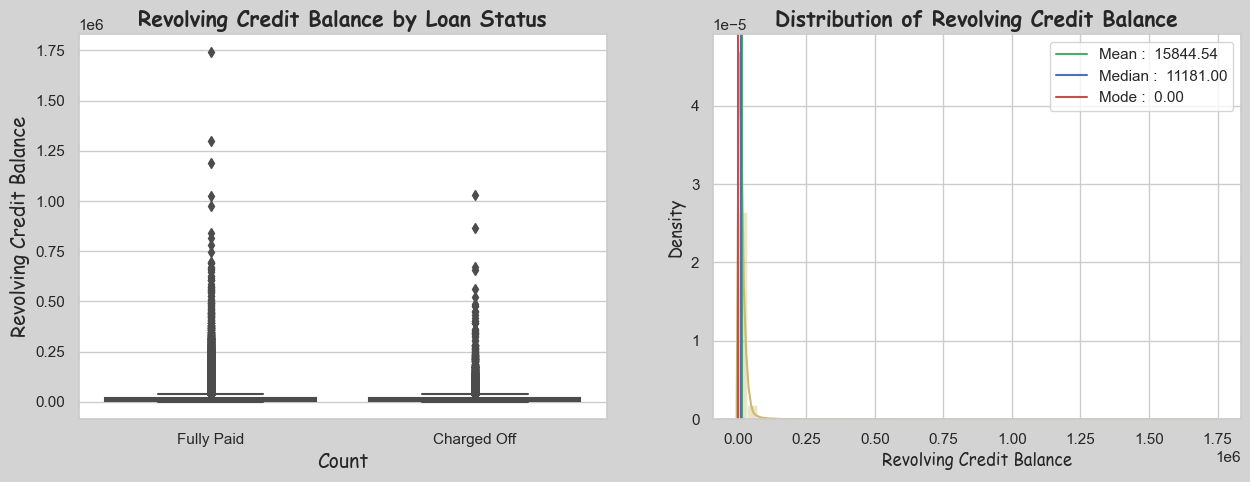

In [58]:
plot_num_var(loan_data,'revol_bal','Revolving Credit Balance')

Inferences:

In [59]:
## trainsforming target variable using numpy.log1p, 
loan_data["revol_bal_ln"] = np.log1p(loan_data["revol_bal"])

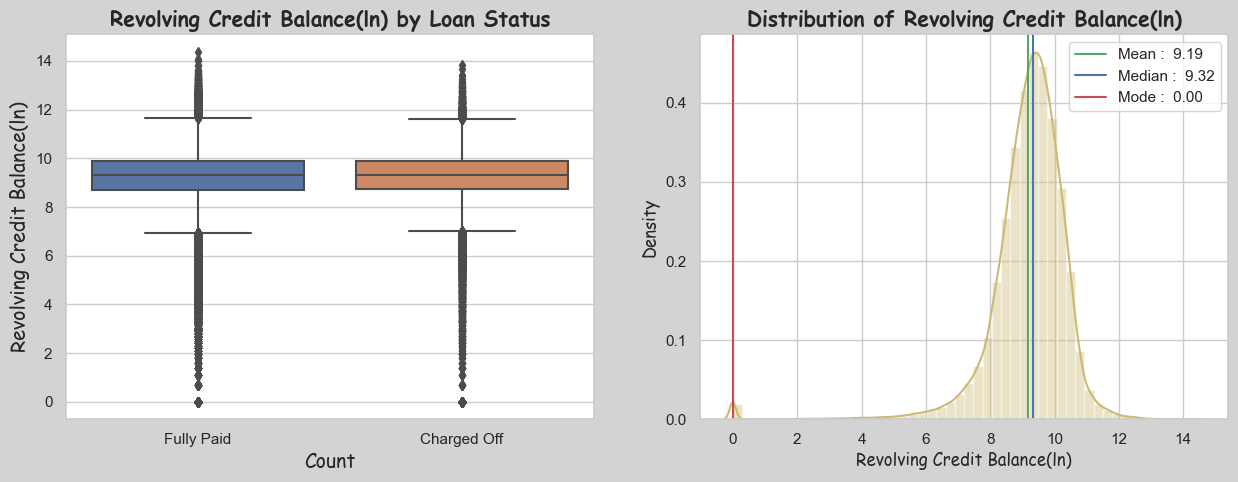

In [60]:
plot_num_var(loan_data,'revol_bal_ln','Revolving Credit Balance(ln)')

In [61]:
loan_data.groupby(['loan_status'])['revol_bal'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15390.454701,18203.387930,0.0,6150.0,11277.0,19485.0,1030826.0
Fully Paid,318357.0,15955.327918,21132.193457,0.0,5992.0,11158.0,19657.0,1743266.0


In [62]:
loan_data.drop('revol_bal_ln', axis=1, inplace=True)

revol_util

In [63]:
loan_data[['revol_util']].describe().T

,count,mean,std,min,25%,50%,75%,max
revol_util,395754.0,53.791749,24.452193,0.0,35.8,54.8,72.9,892.3


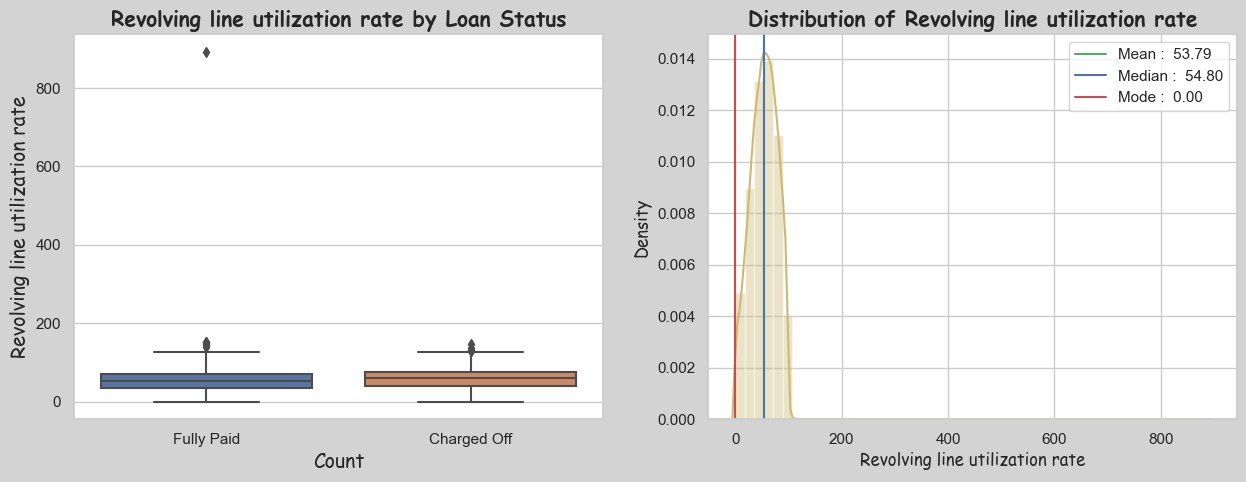

In [64]:
plot_num_var(loan_data,'revol_util','Revolving line utilization rate')

Inferences:

total_acc

In [65]:
loan_data[['total_acc']].describe().T

,count,mean,std,min,25%,50%,75%,max
total_acc,396030.0,25.414744,11.886991,2.0,17.0,24.0,32.0,151.0


In [66]:
loan_data.groupby(['loan_status'])['total_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,24.984152,11.913692,2.0,16.0,23.0,32.0,151.0
Fully Paid,318357.0,25.519800,11.878117,2.0,17.0,24.0,32.0,150.0


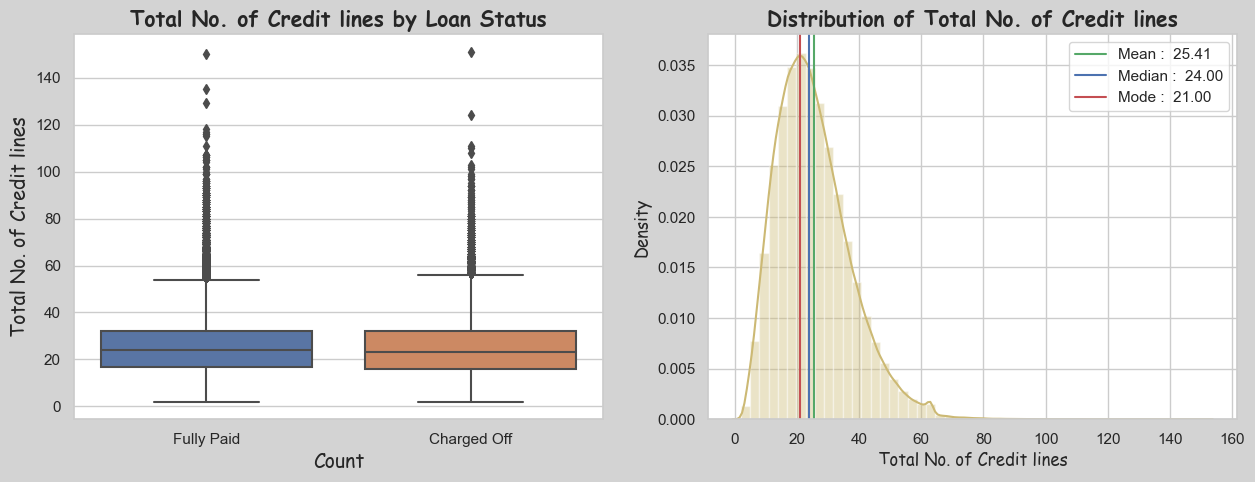

In [67]:
plot_num_var(loan_data,'total_acc','Total No. of Credit lines')

Inferences:

mort_acc

In [68]:
loan_data[['mort_acc']].describe().T

,count,mean,std,min,25%,50%,75%,max
mort_acc,358235.0,1.813991,2.14793,0.0,0.0,1.0,3.0,34.0


In [69]:
loan_data.groupby(['loan_status'])['mort_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,72123.0,1.501213,1.974353,0.0,0.0,1.0,2.0,23.0
Fully Paid,286112.0,1.892836,2.182456,0.0,0.0,1.0,3.0,34.0


In [70]:
loan_data['mort_acc'].value_counts().head(10)

0.0    139777
1.0     60416
2.0     49948
3.0     38049
4.0     27887
5.0     18194
6.0     11069
7.0      6052
8.0      3121
9.0      1656
Name: mort_acc, dtype: int64

In [71]:
loan_data.loc[loan_data['mort_acc']>=10, 'loan_status'].value_counts()

Fully Paid     1797
Charged Off     269
Name: loan_status, dtype: int64

In [72]:
269/(1797+269)

0.13020329138431752

Inferences:

pub_rec_bankruptcies

In [73]:
loan_data['pub_rec_bankruptcies'].value_counts().sort_index()

0.0    350380
1.0     42790
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [74]:
loan_data.loc[loan_data['pub_rec_bankruptcies']>=1, 'loan_status'].value_counts()

Fully Paid     35850
Charged Off     9265
Name: loan_status, dtype: int64

In [75]:
9265/(9265+35850)

0.20536406959991133

Inferences:

Categorical variables

Grade & Sub-grade

In [76]:
print(sorted(loan_data['grade'].unique()))

['A', 'B', 'C', 'D', 'E', 'F', 'G']


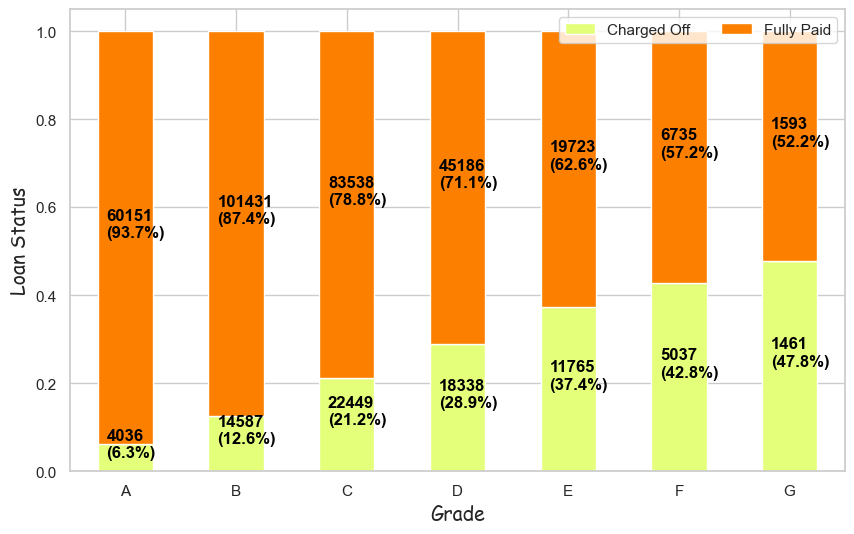

In [77]:
stack_bar(loan_data,'grade',"Grade")

In [78]:
print(sorted(loan_data['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


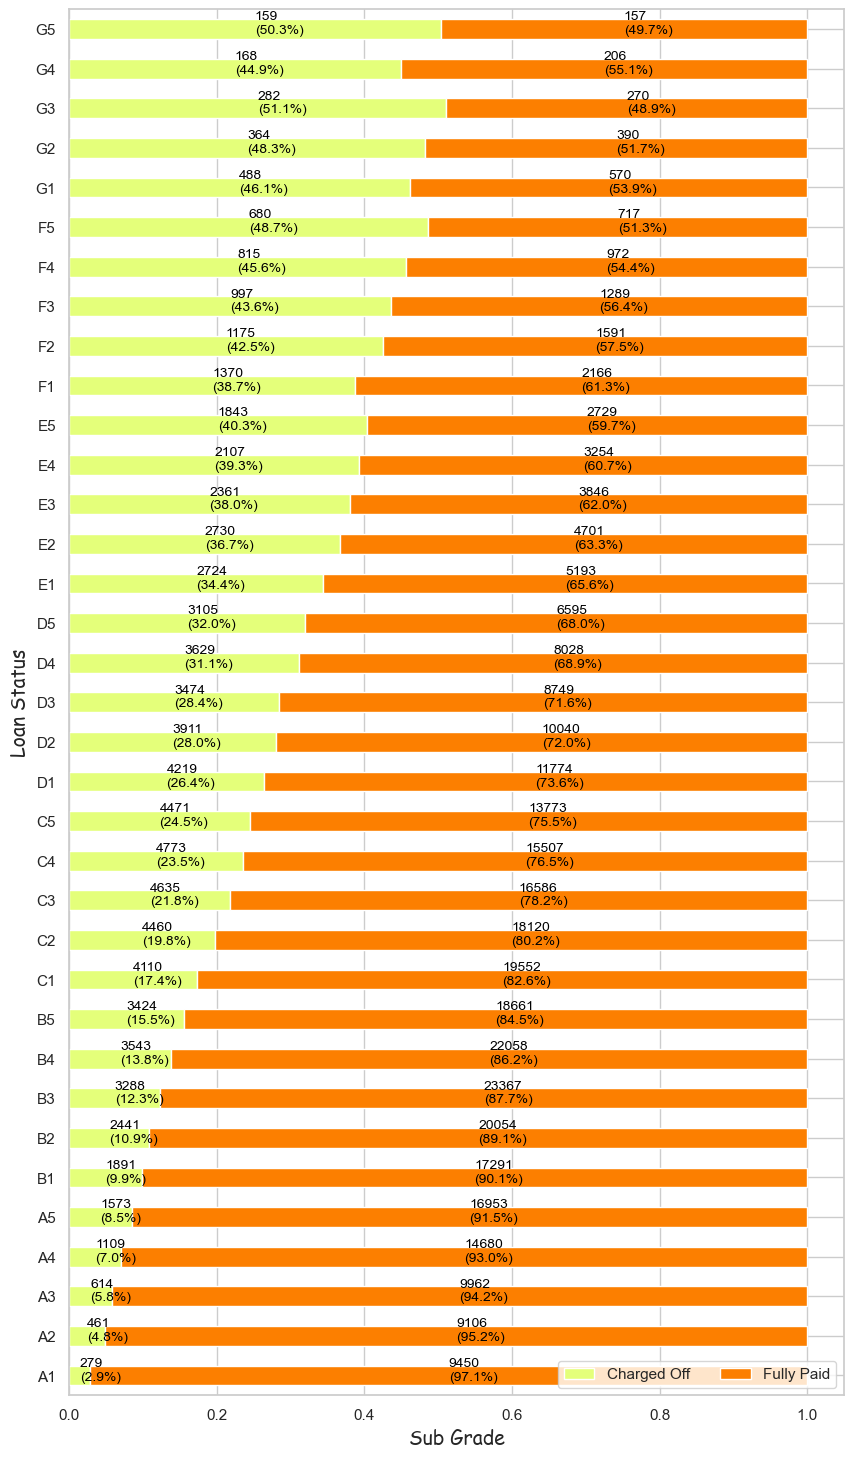

In [79]:
stack_bar_h(loan_data,'sub_grade',"Sub Grade")

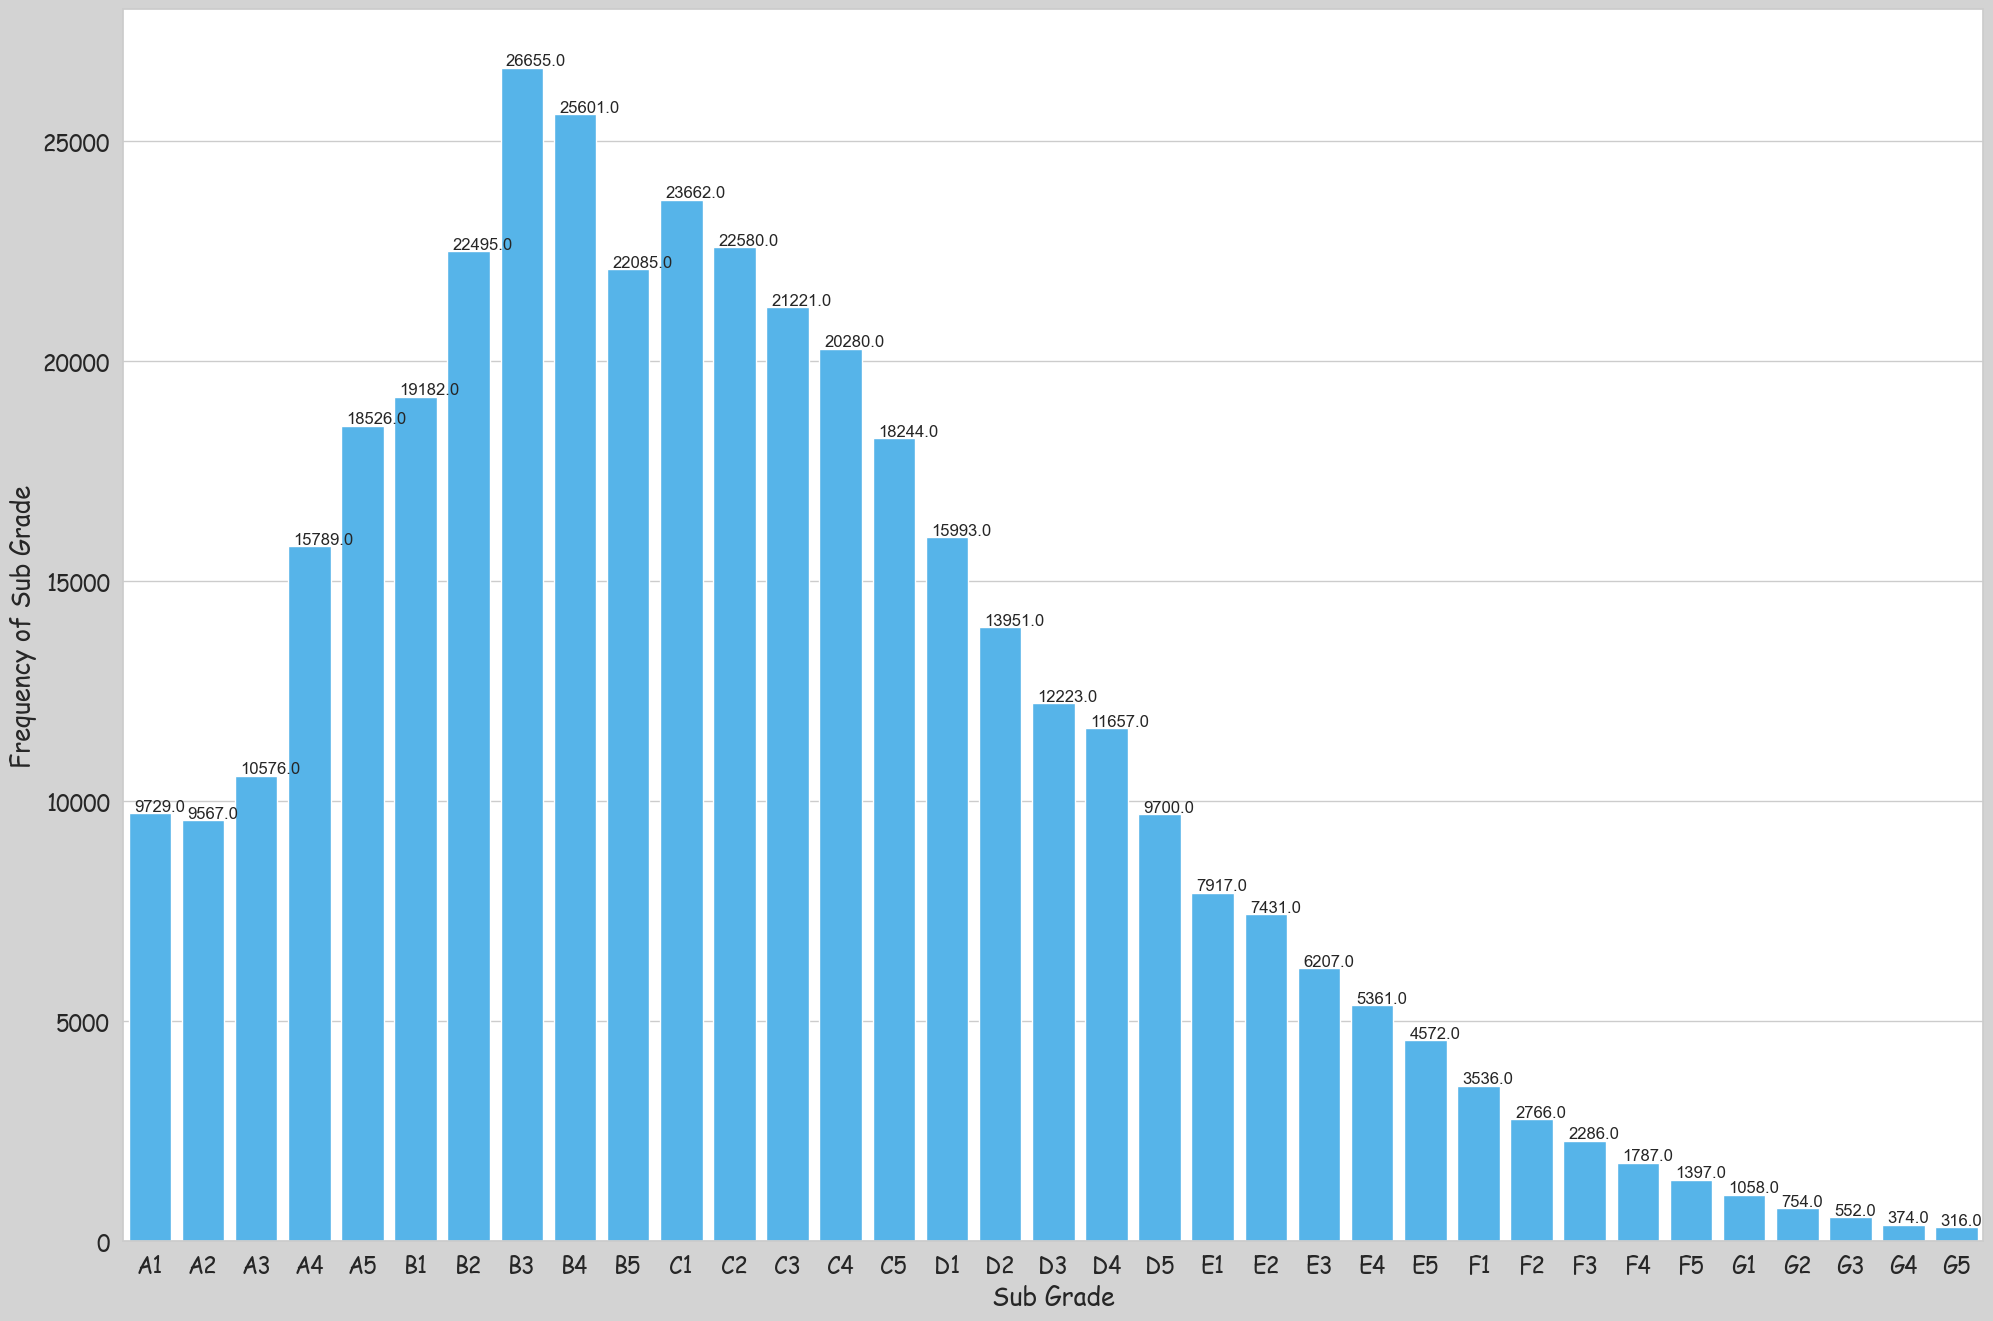

In [80]:
count_plt(loan_data,'sub_grade','Sub Grade',width=24,height=16)

Inferences:

In [81]:
loan_data.drop('grade',axis=1,inplace=True)

Term

In [82]:
loan_data['term'].value_counts()

 36 months    302005
 60 months     94025
Name: term, dtype: int64

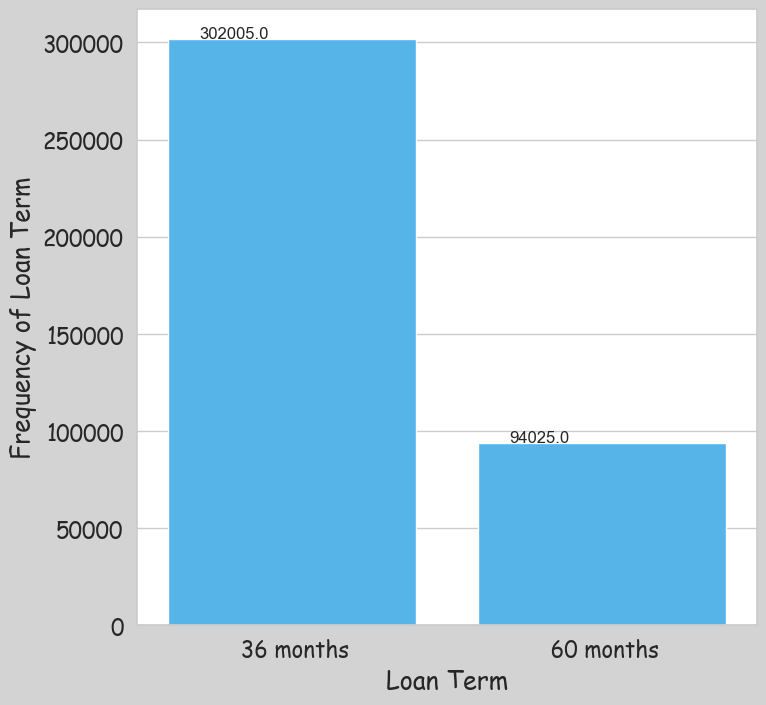

In [83]:
count_plt(loan_data,'term','Loan Term',width=8,height=8)

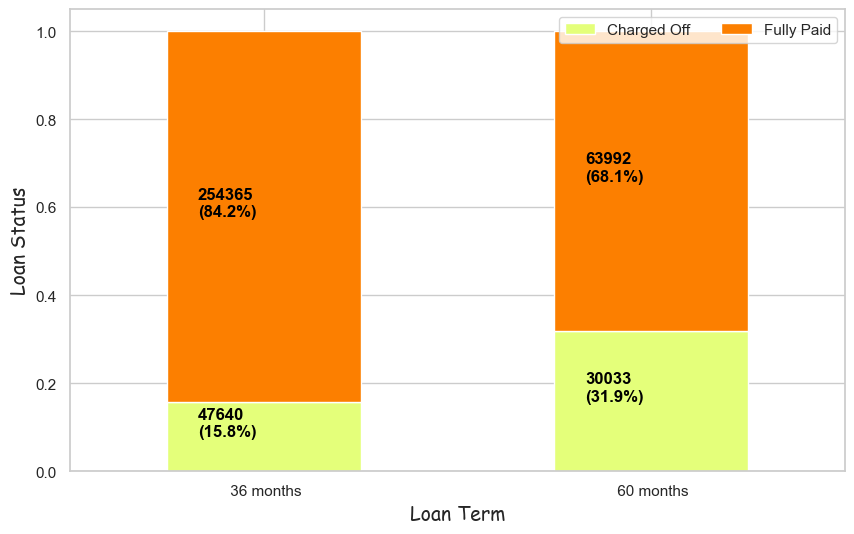

In [84]:
stack_bar(loan_data,'term',"Loan Term")

Converting to integer value:

In [85]:
loan_data['term'] = loan_data['term'].apply(lambda term: np.int8(term.split()[0]))

Inferences:

emp_title

In [86]:
loan_data['emp_title'].nunique()

173105

In [87]:
loan_data['emp_title'].value_counts()

Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: emp_title, Length: 173105, dtype: int64

Inferences:

In [88]:
loan_data.loc[loan_data['emp_title'] == 'Manager', 'loan_status'].value_counts()

Fully Paid     3321
Charged Off     929
Name: loan_status, dtype: int64

In [89]:
929/(3321+929)

0.21858823529411764

In [90]:
loan_data.loc[loan_data['emp_title'] == 'Technition', 'loan_status'].value_counts()

Charged Off    6
Fully Paid     1
Name: loan_status, dtype: int64

In [91]:
(loan_data['emp_title'].nunique()/loan_data.shape[0])*100

43.710072469257376

Inference:

In [92]:
loan_data.drop('emp_title',axis=1,inplace=True)

loan_d

In [93]:
loan_data['issue_d'].value_counts(dropna=False)

Oct-2014    14846
Jul-2014    12609
Jan-2015    11705
Dec-2013    10618
Nov-2013    10496
            ...  
Jul-2007       26
Sep-2008       25
Nov-2007       22
Sep-2007       15
Jun-2007        1
Name: issue_d, Length: 115, dtype: int64

In [94]:
loan_data["issue_d"] = pd.to_datetime(loan_data['issue_d'])

In [95]:
loan_data['issue_d'] = loan_data['issue_d'].dt.year

In [96]:
loan_data['issue_d'].value_counts(dropna=False)

2014    102860
2013     97662
2015     94264
2012     41202
2016     28088
2011     17435
2010      9258
2009      3826
2008      1240
2007       195
Name: issue_d, dtype: int64

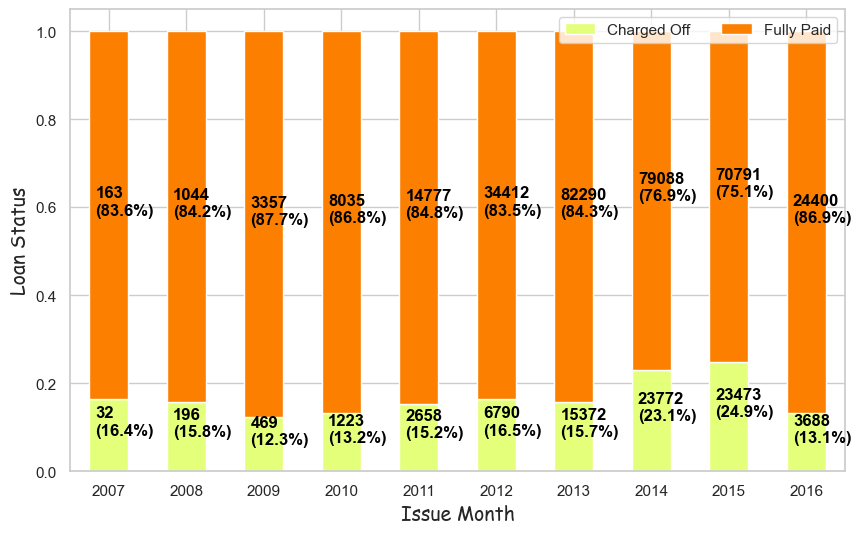

In [97]:
stack_bar(loan_data,'issue_d',"Issue Month")

Inferences:

emp_length

In [98]:
loan_data['emp_length'].value_counts(dropna=False)

10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
NaN           18301
9 years       15314
Name: emp_length, dtype: int64

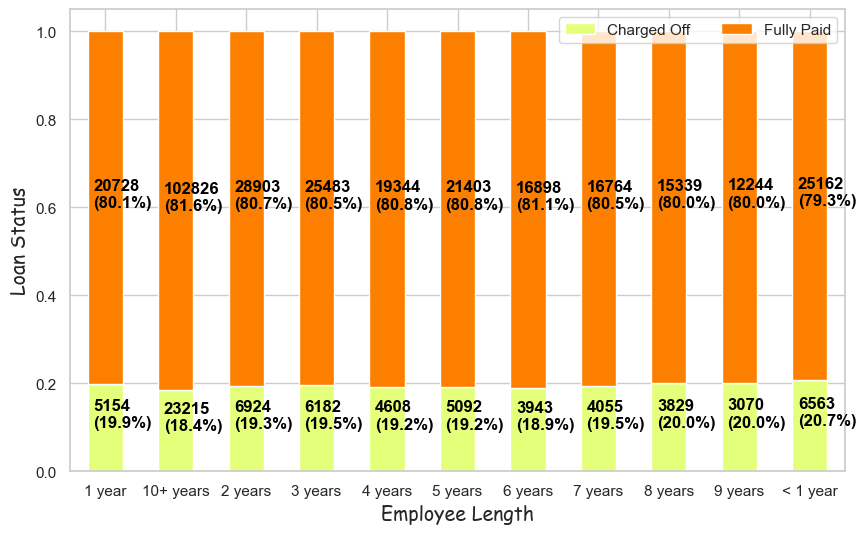

In [99]:
stack_bar(loan_data,'emp_length',"Employee Length")

Inference:

In [100]:
loan_data.drop('emp_length',axis=1,inplace=True)

Home Ownership

In [101]:
loan_data['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

Inference:

In [102]:
loan_data['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

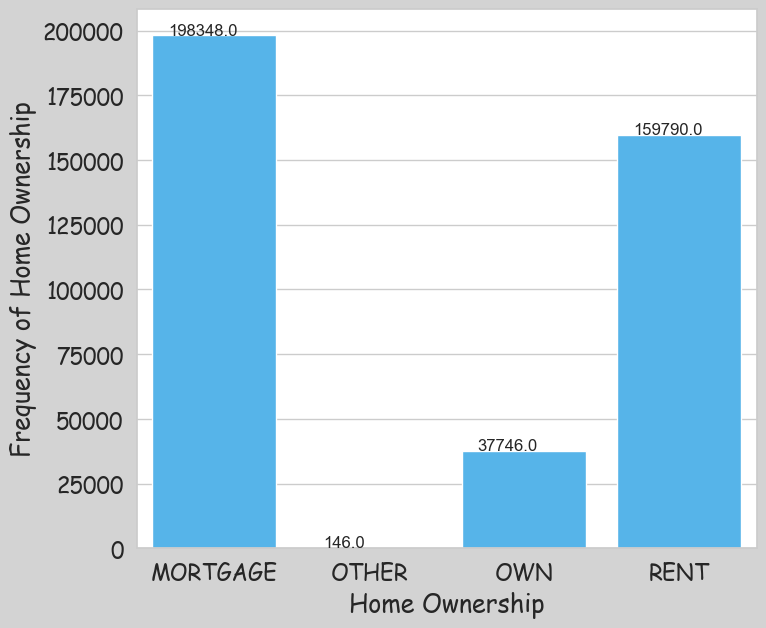

In [103]:
count_plt(loan_data,'home_ownership','Home Ownership',width=8,height=7)

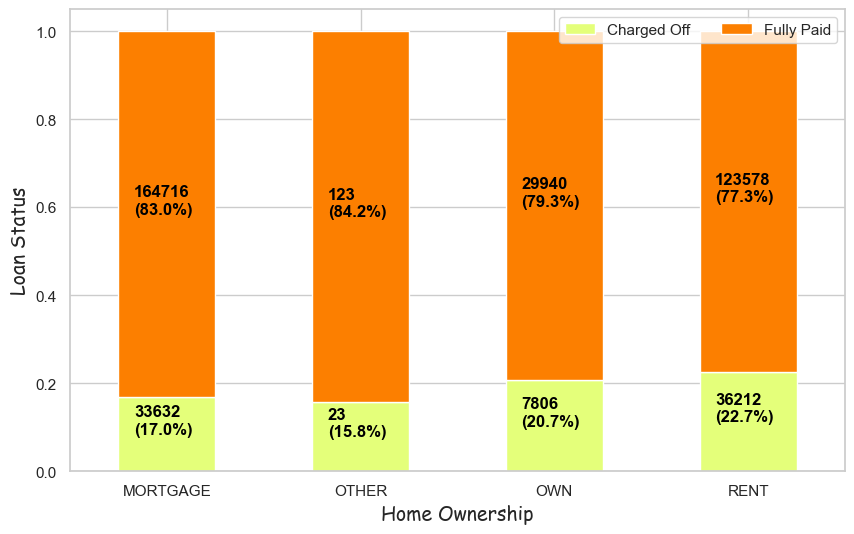

In [104]:
stack_bar(loan_data,'home_ownership','Home Ownership')

Inference:

Verification Status

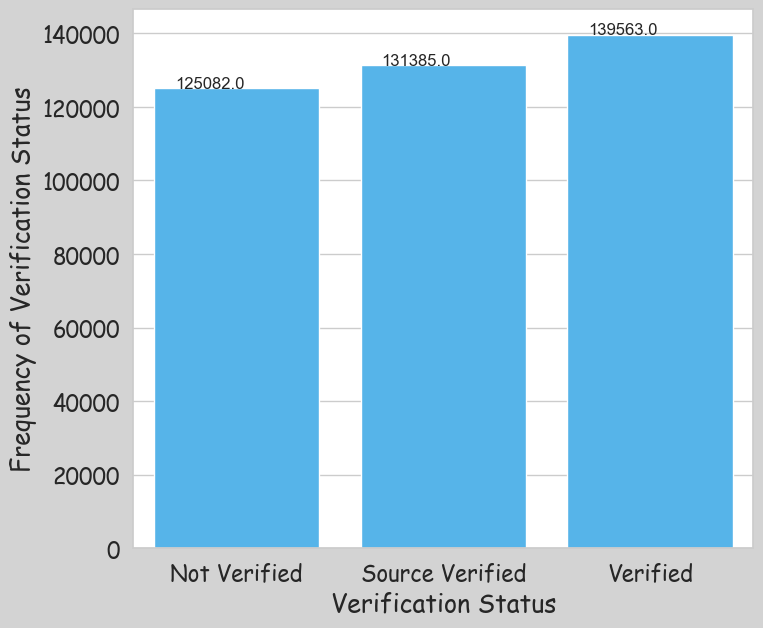

In [105]:
count_plt(loan_data,'verification_status','Verification Status',width=8,height=7)

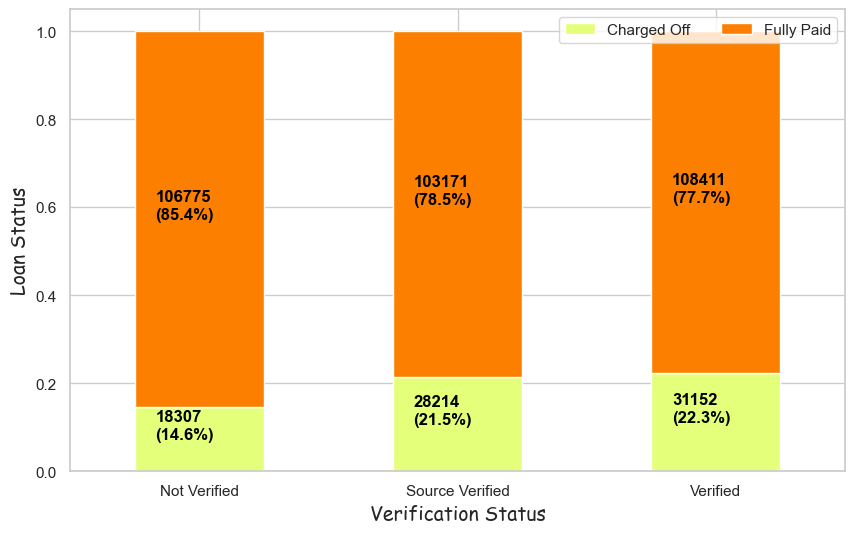

In [106]:
stack_bar(loan_data,'verification_status',"Verification Status")

Inference:

- Although income is verified, the charge-off rate is higher.

Purpose of the loan

In [107]:
loan_data['purpose'].value_counts()

debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: purpose, dtype: int64

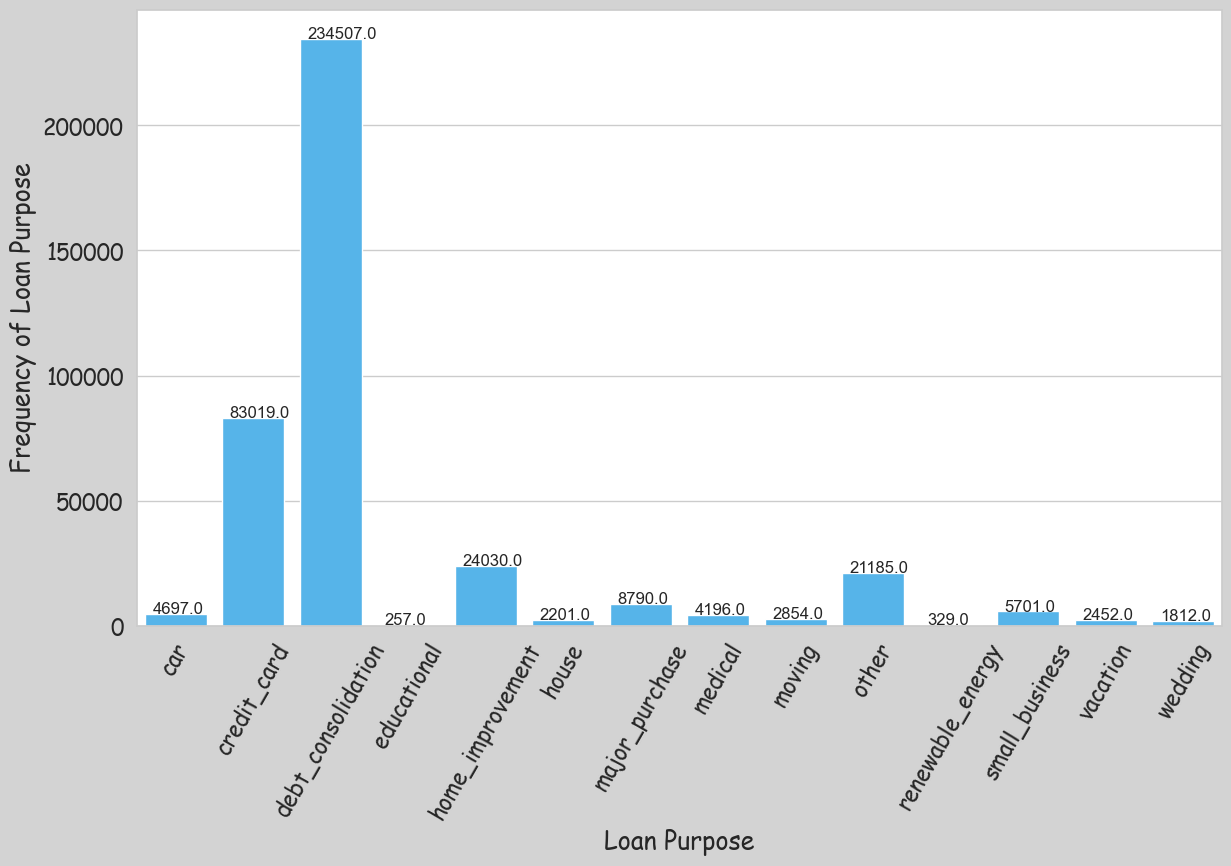

In [108]:
count_plt(loan_data,'purpose','Loan Purpose',width=14,height=8,rotation=60)

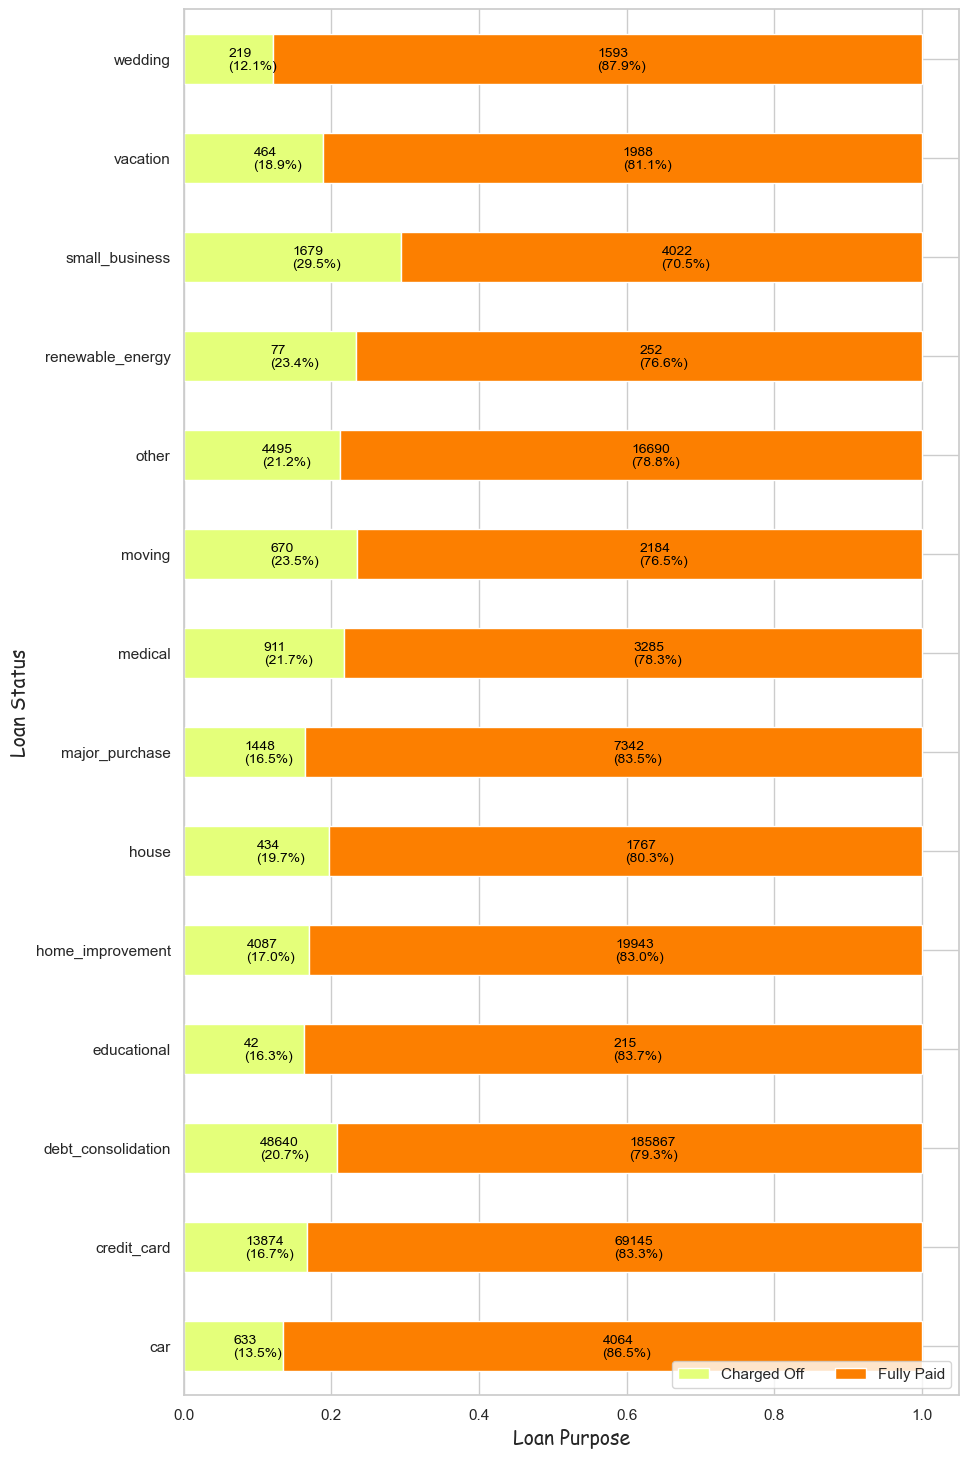

In [109]:
stack_bar_h(loan_data,'purpose',"Loan Purpose")

Inference

- When the aim of the business is to start or to invest in a small business, there is a 30% chance of getting charged-off

Title:

In [110]:
loan_data['title'].nunique()

48817

In [111]:
loan_data['title'].value_counts().head(5)

Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Name: title, dtype: int64

In [112]:
loan_data['title'].value_counts().head(5)

Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Name: title, dtype: int64

In [113]:
loan_data.drop('title',axis=1,inplace=True)

Inferences:

- It appears the title is a subcategory of loan purpose. With 48K+ different sub-purposes and already capturing all the information in the purpose variable, we can remove this variable.

Initial list Status

- Whole loan vs Fraction purpose
- Initial list status indicates the initial listing status of the loan. Possible values are W, F. W stands for whole loans, that is, available to investors to be purchased in their entirety (Borrowers benefit from getting ‘instant funding’).
- Lending club provides a randomized subset of loans by grade available to purchase as a whole loan for a brief period of time (12 hours). The rest are available for fractional purchase.

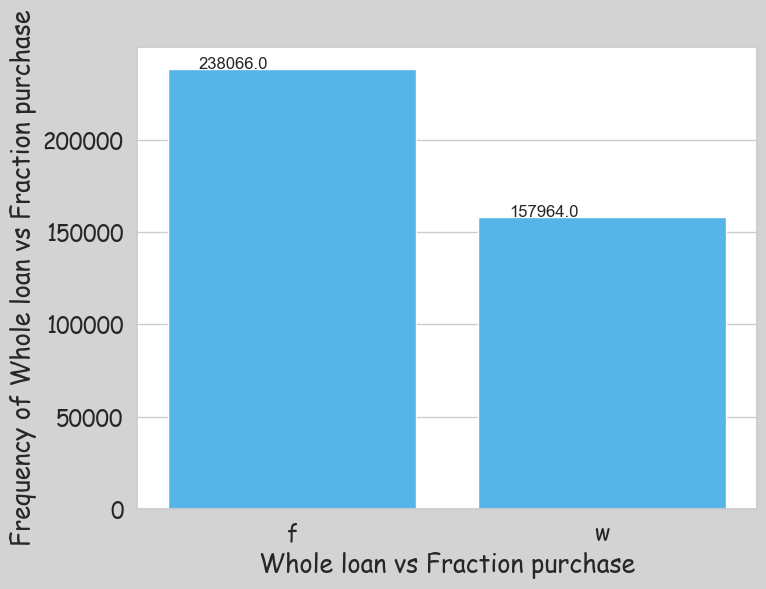

In [114]:
count_plt(loan_data,'initial_list_status','Whole loan vs Fraction purchase',width=8,height=6)

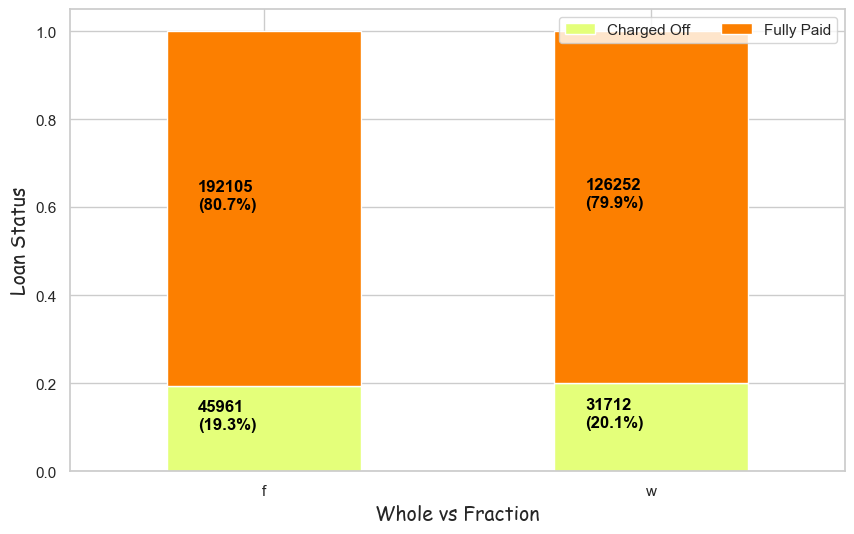

In [115]:
stack_bar(loan_data,'initial_list_status',"Whole vs Fraction")

Application Type

In [116]:
loan_data['application_type'].value_counts()

INDIVIDUAL    395319
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

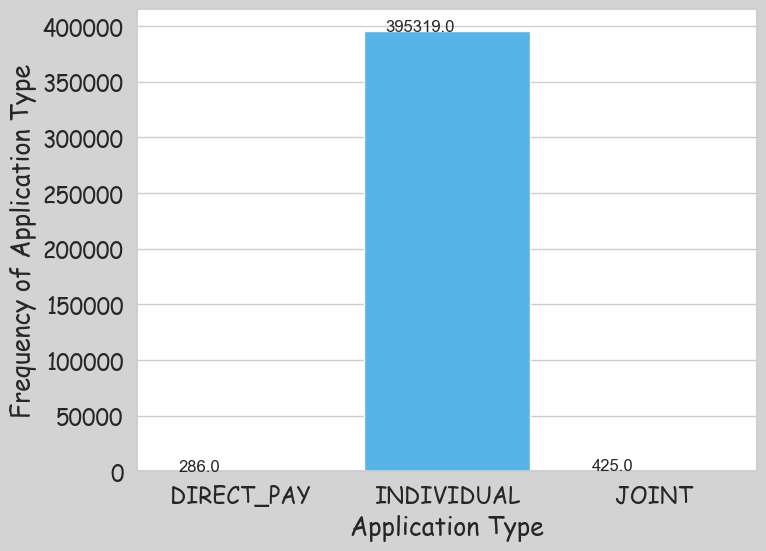

In [117]:
count_plt(loan_data,'application_type','Application Type',width=8,height=6)

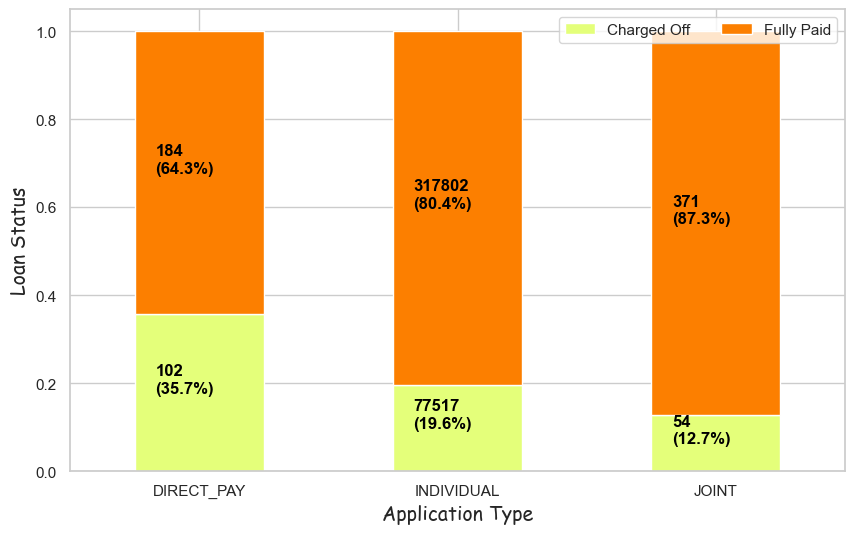

In [118]:
stack_bar(loan_data,'application_type',"Application Type")

Inference:

- The Direct Pay Application Type has a high chance of getting charged-off. Meanwhile, joint pay has a slighty lower chance of being charged off than individual pay

Address:

In [119]:
loan_data['address'].nunique()

393700

In [120]:
(loan_data['address'].nunique()/loan_data.shape[0])*100

99.41166073277276

Inference

- We can group the data by zipcode, which might provide us with more insights.
- In 99% of cases, the values are different. It would be helpful if the data based on state was provided. Hence Fropping the column

In [121]:
loan_data.shape

(396030, 23)

earliest_cr_line

- The month the borrower's earliest reported credit line was opened

In [122]:
loan_data['earliest_cr_line'].nunique()

684

In [123]:
loan_data["earliest_cr_line"] = pd.to_datetime(loan_data['earliest_cr_line'])

In [124]:
loan_data['earliest_cr_line'] = loan_data['earliest_cr_line'].dt.year

In [125]:
loan_data['earliest_cr_line'].value_counts()

2000    29366
2001    29083
1999    26491
2002    25901
2003    23657
        ...  
1951        3
1950        3
1953        2
1944        1
1948        1
Name: earliest_cr_line, Length: 65, dtype: int64

# Feature Engineering

address

- Extracting the Zipcode from the address

In [126]:
loan_data['zipcode'] = loan_data['address'].apply(lambda address:address[-5:])

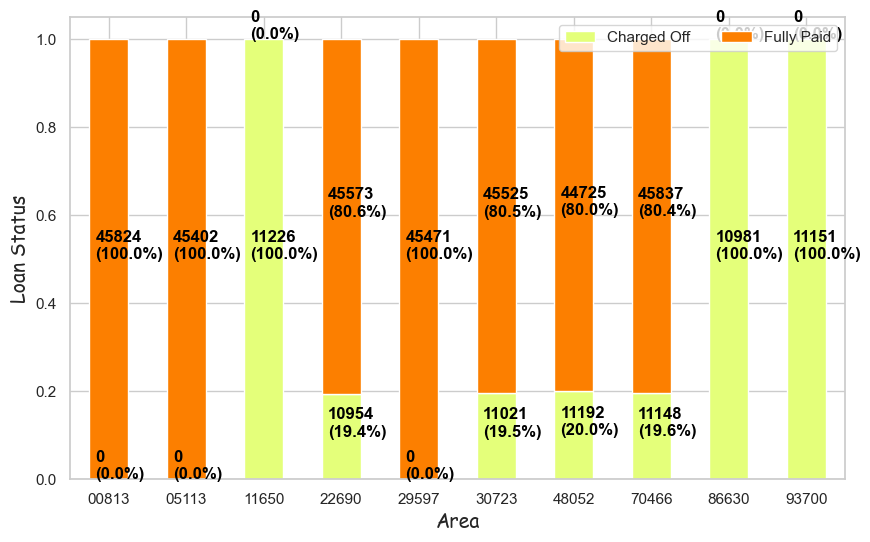

In [127]:
stack_bar(loan_data,'zipcode',"Area")

Inference


- Based on the above graph, we can see that zip codes 11650,86630, and 93700 have a 100% probability of getting charged-off.

In [128]:
loan_data.drop('address',axis=1,inplace=True)

Inference

- Important information is already captured as part of zipcode. Hence dropping the column

dti

- According to our previous analysis, dti greater than 50 has 35% of the loan to be charged-off, whereas dti less than 10 has only 13% of the loan to be charged-off.
- Lets divide the dti value into bins to understand the impact on the loan_status

In [129]:
bins = [0,10,20,30,1000]
labels =["0-10","10-20","20-30",  "  Above 30"]
loan_data['dti_cat'] = pd.cut(loan_data['dti'], bins,labels=labels)

In [130]:
loan_data['dti_cat'].head()

0         20-30
1         20-30
2         10-20
3          0-10
4      Above 30
Name: dti_cat, dtype: category
Categories (4, object): ['0-10' < '10-20' < '20-30' < '  Above 30']

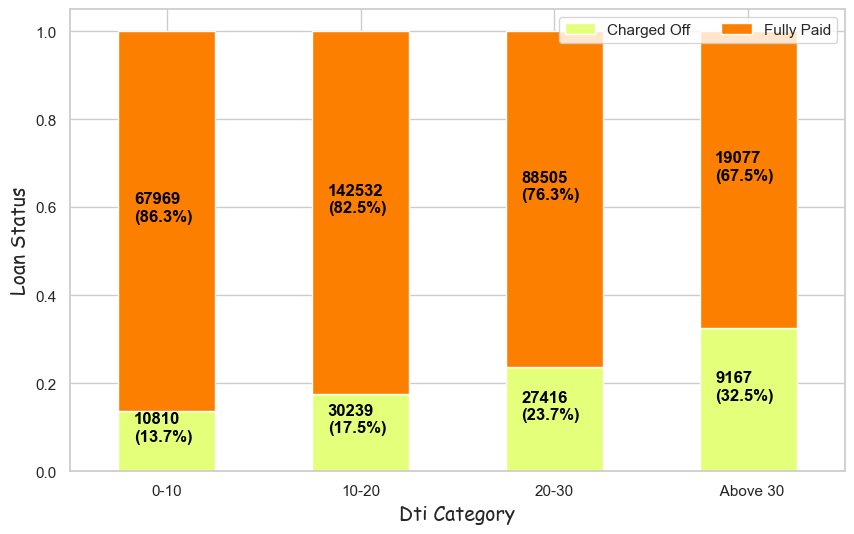

In [131]:
stack_bar(loan_data,'dti_cat',"Dti Category")

In [132]:
loan_data.drop('dti',axis=1,inplace=True)

Inferences:

- It is clear that as the dti value increases, so does the probability of being charged off.

pub_rec

In [133]:
def pub_rec(num):
    if num <= 2:
        return 0
    elif num >= 0:
        return 1
    else:
        return num

In [134]:
loan_data['pub_rec_cat'] = loan_data.pub_rec.apply(pub_rec)

In [135]:
loan_data["pub_rec_cat"] = loan_data["pub_rec_cat"].astype("category")

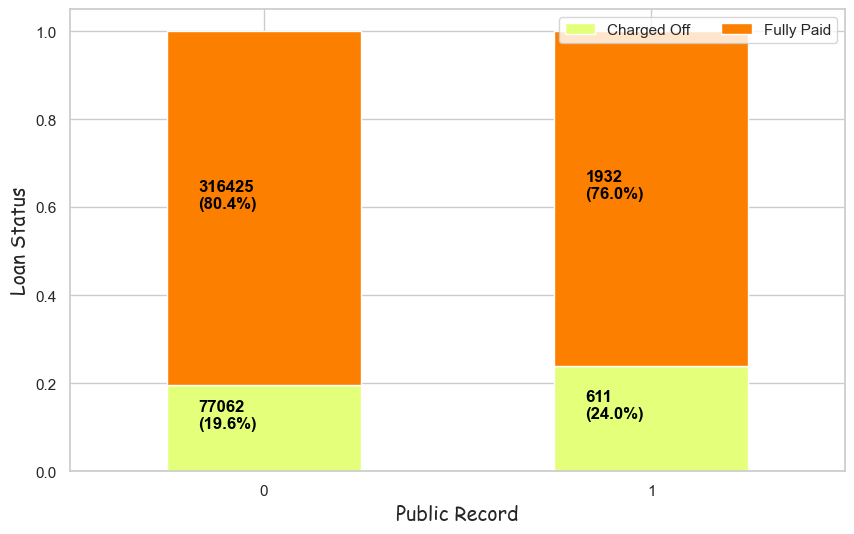

In [136]:
stack_bar(loan_data,'pub_rec_cat',"Public Record")

Inference:

- If Public record having derogatory value more than 2 then we can see loan getting charged-off by 24%

mort_acc

In [137]:
def mort_acc(num):
    if num == 0.0:
        return 0
    elif num >= 1.0:
        return 1
    else:
        return num

In [138]:
loan_data['mort_acc_cat'] = loan_data.mort_acc.apply(mort_acc)
loan_data["mort_acc_cat"] = loan_data["mort_acc_cat"].astype("category")

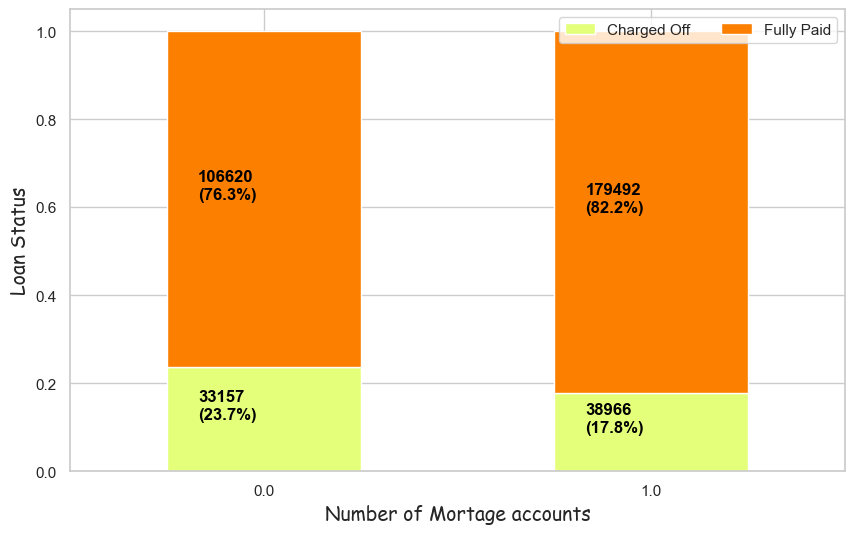

In [139]:
stack_bar(loan_data,'mort_acc_cat',"Number of Mortage accounts")

In [140]:
loan_data.drop('mort_acc',axis=1,inplace=True)

Inference

- The probability of the loan getting charged off is 24% if the borrower does not have a mortgage account.

pub_rec_bankruptcies

In [141]:
def pub_rec_bankruptcies(num):
    if num == 0.0:
        return 0
    elif num >= 1.0:
        return 1
    else:
        return num

In [142]:
loan_data['pub_rec_bankruptcies_cat'] = loan_data.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)
loan_data["pub_rec_bankruptcies_cat"] = loan_data["pub_rec_bankruptcies_cat"].astype("category")

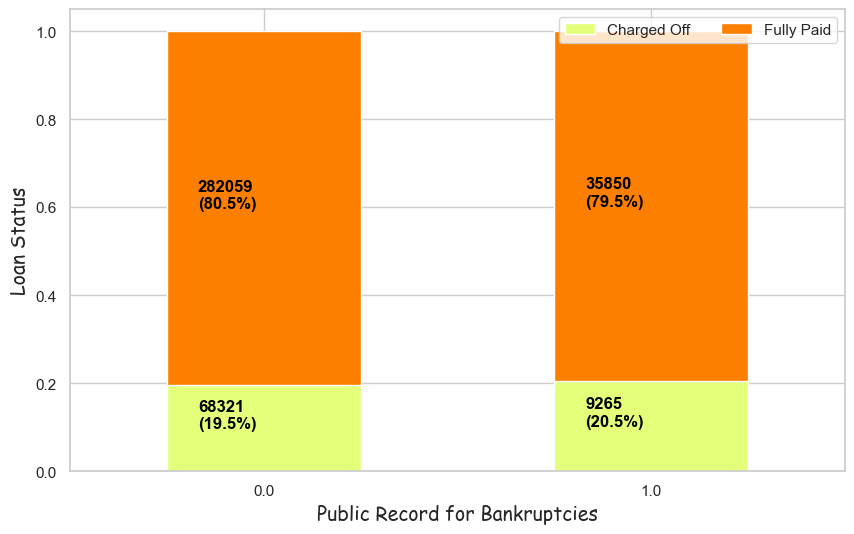

In [143]:
stack_bar(loan_data,'pub_rec_bankruptcies_cat',"Public Record for Bankruptcies")

In [144]:
loan_data.drop('pub_rec_bankruptcies',axis=1,inplace=True)

Inference

- If there are more bankruptcies on public records than 1 then we can see the loan getting charged off by 20%

loan_stats (Target Variable)

In [145]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [146]:
def loan_status(str_):
    if str_ == 'Charged Off':
        return 1
    else:
        return 0

In [147]:
loan_data['loan_status'] = loan_data.loan_status.apply(loan_status)

In [148]:
loan_data['loan_status'].unique()

array([0, 1], dtype=int64)

In [149]:
loan_data.shape

(396030, 24)

Inferences:

- Overall we have 23 features which shows some relations w.r.t. target variable.
- After EDA we have removed few features
     - emp_length
     - emp_title
     - grade
     - title
- Few new features are derived from existing features
  - pub_rec_bankruptcies_cat
  - dti_cat
  - zipcode
  - mort_acc_cat
  - pub_rec_cat

# Checking Correlation 

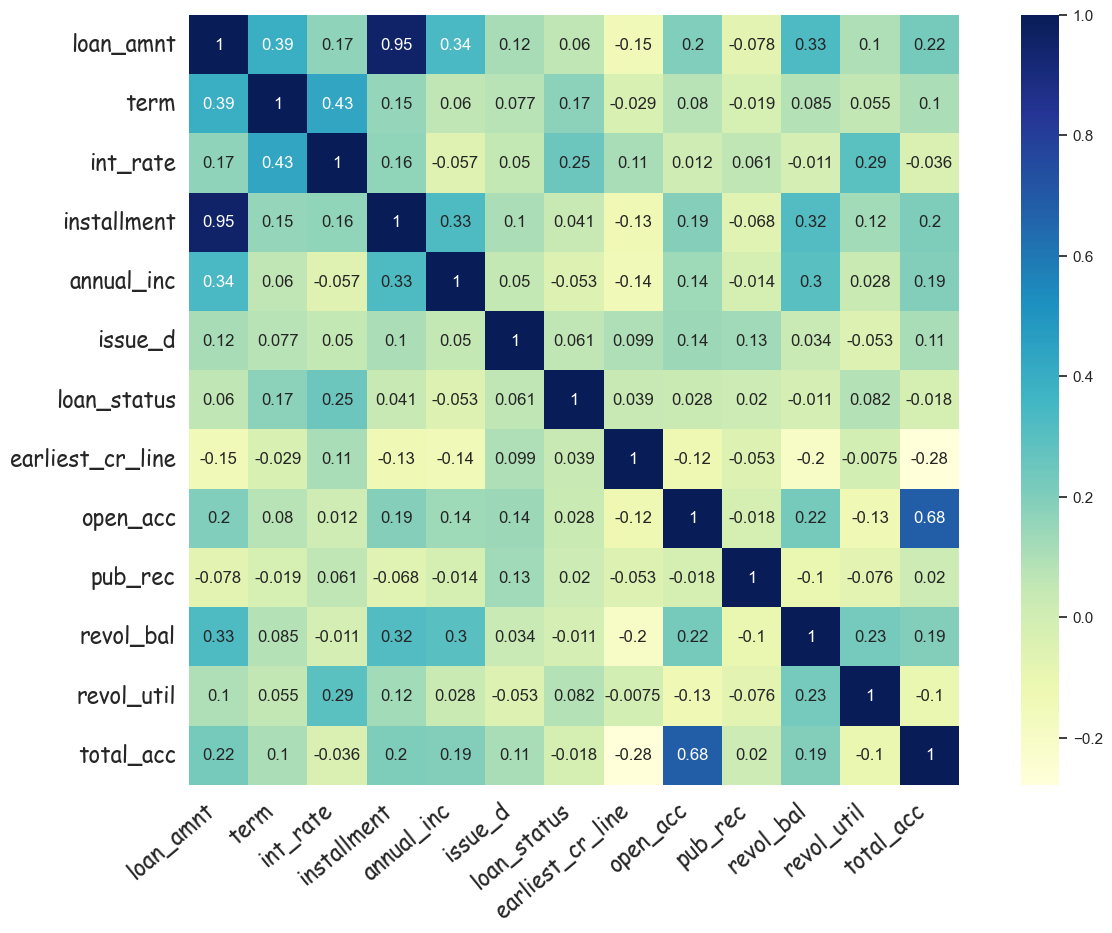

In [150]:
plt.figure(figsize = (16, 10))
ax = sns.heatmap(loan_data.corr(),
            annot=True,cmap='YlGnBu',square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=40,fontsize=16,family = "Comic Sans MS",
    horizontalalignment='right')

ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,fontsize=16,family = "Comic Sans MS",
    horizontalalignment='right')
    
plt.show()

Inferences:

- Loan Amount ad installment is highly corelated with 95%.
- Not much correlation between other variables can be observed. open_acc and total_acc are most co-related features with     68%

# Handling Categorical Variables

- Categorical to Numerical - Our training data more useful and expressive, and it can be rescaled easily. By using numeric values, we more easily determine a probability for our values. In particular, one hot encoding is used for our output values, since it provides more nuanced predictions than single labels

- One Hot Encoding

We use this categorical data encoding technique when the features are nominal(do not have any order). In one hot      encoding, for each level of a categorical feature, we create a new variable. Each category is mapped with a binary variable containing either 0 or 1. Here, 0 represents the absence, and 1 represents the presence of that category.

In [151]:
loan_data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'application_type', 'zipcode', 'dti_cat', 'pub_rec_cat', 'mort_acc_cat',
       'pub_rec_bankruptcies_cat'],
      dtype='object')

In [152]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   loan_amnt                 396030 non-null  float64 
 1   term                      396030 non-null  int8    
 2   int_rate                  396030 non-null  float64 
 3   installment               396030 non-null  float64 
 4   sub_grade                 396030 non-null  object  
 5   home_ownership            396030 non-null  object  
 6   annual_inc                396030 non-null  float64 
 7   verification_status       396030 non-null  object  
 8   issue_d                   396030 non-null  int64   
 9   loan_status               396030 non-null  int64   
 10  purpose                   396030 non-null  object  
 11  earliest_cr_line          396030 non-null  int64   
 12  open_acc                  396030 non-null  float64 
 13  pub_rec                   396

In [153]:
loan_data.shape

(396030, 24)

In [154]:
cat_columns = ['sub_grade', 'home_ownership','verification_status', 'issue_d', 
               'purpose',  'initial_list_status', 'application_type','zipcode',
       'dti_cat', 'pub_rec_cat', 'mort_acc_cat', 'pub_rec_bankruptcies_cat']

In [155]:
dummyVar = pd.get_dummies(loan_data[cat_columns],drop_first=True)
dummyVar.shape

(396030, 71)

In [156]:
dummyVar.head()

,issue_d,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,...,zipcode_48052,zipcode_70466,zipcode_86630,zipcode_93700,dti_cat_10-20,dti_cat_20-30,dti_cat_ Above 30,pub_rec_cat_1,mort_acc_cat_1.0,pub_rec_bankruptcies_cat_1.0
0,2015,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2015,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
2,2015,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,2014,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [157]:
# Merging the dummy variable to significant variable dataframe.
loan_data_encoded = pd.concat([loan_data,dummyVar],axis=1)
loan_data_encoded.shape

(396030, 95)

In [158]:
# Dropping origincal Categorical variables as no need. Already added them as numerical.
loan_data_encoded.drop(cat_columns,axis=1,inplace=True)
loan_data_encoded.shape

(396030, 82)

In [159]:
loan_data_encoded.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'sub_grade_A2', 'sub_grade_A3',
       'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2',
       'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1',
       'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5',
       'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4',
       'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3',
       'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2',
       'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1',
       'sub_grade_G2', 'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
     

# Train, Validation & Test split

In [160]:
# Train & Test data split
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [161]:
#putting features variables in X
X = loan_data_encoded.drop(['loan_status'], axis=1)

#putting response variables in Y
y = loan_data_encoded['loan_status']    

# Splitting the data into train and test
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X,y, train_size=0.8,test_size=0.2,random_state=100)

Train and Cross-Validation Split

In [162]:
# Splitting the data into train and test
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv,y_tr_cv,test_size=0.25,random_state=1)

Libraries used for model selection

In [163]:
# For imputation to NAN values.
from sklearn.impute import SimpleImputer

# For rescaling we are using Standarad scaler
from sklearn.preprocessing import StandardScaler

# For logistic regression model
from sklearn.linear_model import LogisticRegression

# For feature selection
from sklearn.feature_selection import RFE

# For pipeline creation
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

# For collecting different metrics.
from sklearn.metrics import f1_score
from sklearn import metrics

Utility Function Draw ROC curve

- True Positve rate vs False Positive rate

In [164]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

# Handling Missing Values

- Data is not complete without handling missing values and many machine learning algorithms do not allow missing values.
- It is essential to address any missing data before feeding it to your model.
- In the case study we are using SimpleImputer with median.

In [165]:
imputer = SimpleImputer(strategy='median', missing_values=np.nan)

- Rescaling the Features

As per above table, features are varying in different ranges. This will be problem. It is important that we rescale the feature such that thay have a comparable scales. This can lead us time consuming during model evaluation.

So it is advices to Standardization and normalization so that units of coefficients obtained are in same scale. Two common ways of rescaling are

Standardization (mean-0, sigma-1)
Min-Max scaling (Normization)
In this case we are using Standardizationscaling

In [166]:
scaler = StandardScaler()

Build Pipeline

- Imputation
- Rescaling
- Building the model

1. Basic Model creation

In [167]:
pl_basic_logreg = Pipeline(steps=[('imputer',imputer),
                              ('scaler',scaler),
                              ('logistic_model',LogisticRegression())
                             ]) 

In [168]:
pl_basic_logreg.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('logistic_model', LogisticRegression())])

In [169]:
train_y_pred = pl_basic_logreg.predict(X_train)
train_score = f1_score(y_train, train_y_pred)

In [170]:
print(" F1 Score for Basic Model (Train) ", train_score)

 F1 Score for Basic Model (Train)  0.6160009255777631


In [171]:
X_test['revol_util'] = X_test['revol_util'].fillna(X_test['revol_util'].median())

In [172]:
y_pred_test = pl_basic_logreg.predict(X_test)
test_score = f1_score(y_test, y_pred_test)

print("F1 Score for Basic Model (Test) ",test_score)

F1 Score for Basic Model (Test)  0.6228797015313868


2. Using Hyper-parameter Optimization

In [186]:
train_scores = []
val_scores = []

la_low = 0.01
la_upp = 100
la_diff = 5

for lambda_ in np.arange(la_low,la_upp,la_diff):
    hp_logreg = Pipeline(steps=[('imputer',imputer),
                              ('scaler',scaler),
                              ('logistic_model',LogisticRegression(C=1/lambda_))
                             ])  
    hp_logreg.fit(X_train, y_train)
    train_y_pred = hp_logreg.predict(X_train)
    val_y_pred = hp_logreg.predict(X_val)
    train_score = f1_score(y_train, train_y_pred)
    val_score = f1_score(y_val, val_y_pred)
    train_scores.append(train_score)
    val_scores.append(val_score)

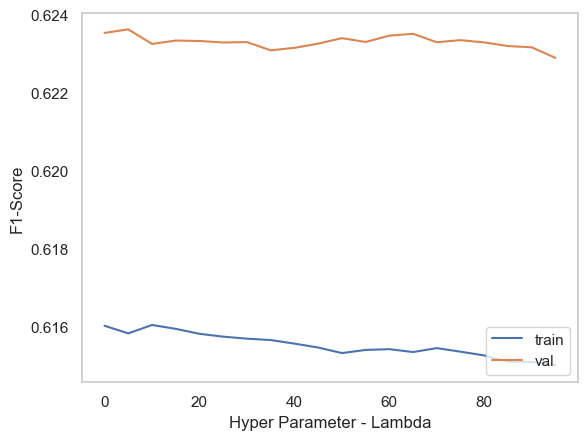

In [174]:
plt.figure()
plt.plot(list(np.arange(la_low,la_upp,la_diff)), train_scores, label="train")
plt.plot(list(np.arange(la_low,la_upp,la_diff)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("Hyper Parameter - Lambda")
plt.ylabel("F1-Score")
plt.grid()
plt.show()

In [175]:
# Model with lambda_best
best_hp_clwg_model = np.argmax(val_scores)
print(val_scores[best_hp_clwg_model])

0.6236187845303868


In [176]:
l_best = la_low+la_diff*best_hp_clwg_model
best_hp_clwg_logreg = Pipeline(steps=[('imputer',imputer),
                              ('scaler',scaler),
                              ('logistic_model',LogisticRegression(C=1/l_best,class_weight={0:0.25, 1:0.75 }))
                             ])   
best_hp_clwg_logreg.fit(X_train, y_train)

y_pred_test = best_hp_clwg_logreg.predict(X_test)
test_score = f1_score(y_test, y_pred_test)

print('F1 Score for Best Hyper-Parmeter with class weight Model (Test) ',test_score)

F1 Score for Best Hyper-Parmeter with class weight Model (Test)  0.6421461588633979


In [177]:
print(f"Accuracy : {metrics.accuracy_score(y_test, y_pred_test)*100}%")
print(f"recall_score : {metrics.recall_score(y_test, y_pred_test)*100}%")
print(f"precision_score : {metrics.precision_score(y_test, y_pred_test)*100}%")
print(f"f1_score : {metrics.f1_score(y_test, y_pred_test)*100}%")
print(f"AUC score : {metrics.roc_auc_score( y_test, y_pred_test)*100}%")
print(f"confusion_matrix :")
print(metrics.confusion_matrix(y_test, y_pred_test))

Accuracy : 84.0681261520592%
recall_score : 73.06873184898355%
precision_score : 57.27438284095507%
f1_score : 64.21461588633979%
AUC score : 79.90599719695649%
confusion_matrix :
[[55265  8446]
 [ 4173 11322]]


In [178]:
print(metrics.classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     63711
           1       0.57      0.73      0.64     15495

    accuracy                           0.84     79206
   macro avg       0.75      0.80      0.77     79206
weighted avg       0.86      0.84      0.85     79206



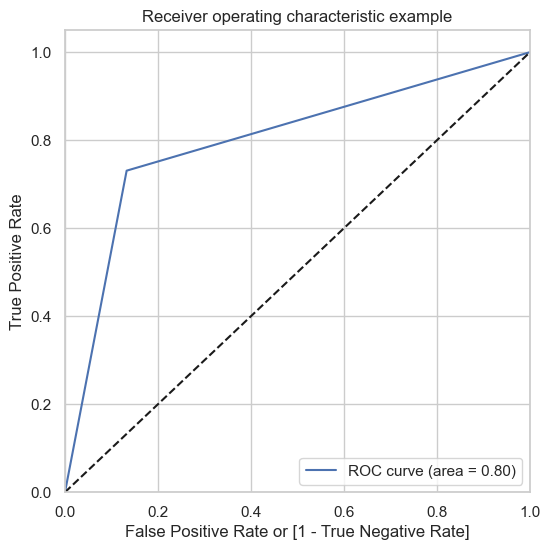

(array([0.        , 0.13256737, 1.        ]),
 array([0.        , 0.73068732, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [179]:
draw_roc(y_test, y_pred_test)

Recall vs Precision 

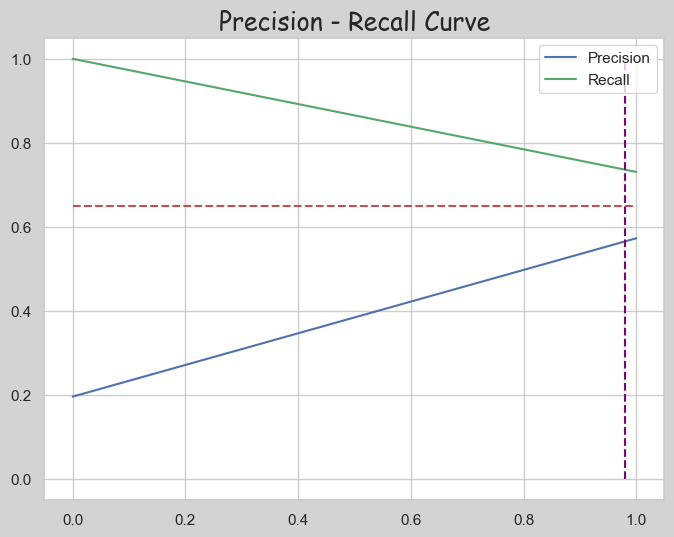

In [180]:
fig = plt.figure(figsize = (8,6))
fig.set_facecolor("lightgrey")

# Precision Recall Curve
precision, recall, thresholds = metrics.precision_recall_curve(y_test, y_pred_test)
plt.plot(thresholds, precision[:-1], "b",label='Precision')
plt.plot(thresholds, recall[:-1], "g",label='Recall')
plt.vlines(x=0.98,ymax=1,ymin=0.0,color="purple",linestyles="--")
plt.hlines(y=0.65,xmax=1,xmin=0.0,color="r",linestyles="--")
plt.title('Precision - Recall Curve',fontsize=18,family = "Comic Sans MS")
plt.legend()
plt.show()

Top 5 features that played key role in getting charged-off or not

- Used RFE technique


In [187]:
X_train['revol_util'] = X_train['revol_util'].fillna(X_train['revol_util'].median()) 

In [188]:
rfe = RFE(best_hp_clwg_logreg['logistic_model'], n_features_to_select=15)             
rfe = rfe.fit(X_train, y_train)

In [189]:
cols=X_train.columns[rfe.support_]
cols

Index(['sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'zipcode_05113', 'zipcode_11650',
       'zipcode_29597', 'zipcode_86630', 'zipcode_93700'],
      dtype='object')

In [190]:
#Function to fit the logistic regression model from the statmodel package
def fit_LogRegModel(X_train):
    # Adding a constant variable  
    X_train = sm.add_constant(X_train)
    lm = sm.GLM(y_train,X_train,family = sm.families.Binomial()).fit() 
    print(lm.summary())
    return lm

In [191]:
# Calculate the VIFs for the new model
def getVIF(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

# Assessing the Model using StatsModels

In [192]:
# Creating X_test dataframe with RFE selected variables
X_train_GM = X_train[cols]
lm = fit_LogRegModel(X_train_GM)

                 Generalized Linear Model Regression Results                  
Dep. Variable:            loan_status   No. Observations:               237618
Model:                            GLM   Df Residuals:                   237602
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -71016.
Date:                Sat, 08 Jul 2023   Deviance:                   1.4203e+05
Time:                        12:44:42   Pearson chi2:                 1.63e+05
No. Iterations:                    30   Pseudo R-squ. (CS):             0.3246
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.5295      0.007   -217.145

In [193]:
X_train_GM = X_train_GM.drop(['zipcode_05113','zipcode_86630','zipcode_93700','zipcode_11650','zipcode_29597'], axis=1)

In [194]:
lm = fit_LogRegModel(X_train_GM)

                 Generalized Linear Model Regression Results                  
Dep. Variable:            loan_status   No. Observations:               237618
Model:                            GLM   Df Residuals:                   237607
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1461e+05
Date:                Sat, 08 Jul 2023   Deviance:                   2.2922e+05
Time:                        12:44:43   Pearson chi2:                 2.38e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.02528
Covariance Type:            nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.3119      0.005   -240.677   

In [195]:
# Refit the model with the new set of features

logm1 = sm.GLM(y_train,(sm.add_constant(X_train_GM)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            loan_status   No. Observations:               237618
Model:                            GLM   Df Residuals:                   237607
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.1461e+05
Date:                Sat, 08 Jul 2023   Deviance:                   2.2922e+05
Time:                        12:44:44   Pearson chi2:                 2.38e+05
No. Iterations:                     6   Pseudo R-squ. (CS):            0.02528
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -1.3119      0.005   -240.677      0.000      -1.323      -1.301
sub_grade_A2    -1.6976      0.062    -27.178      0.000      -1.820      -1.575
sub_grade_A3    -1.4602      0.054    -27.218      0.000      -1.565      -1.355
sub_grade_A4    -1.2617      0.040    -31.330      0.000      -1.341      -1.183
sub_grade_A5    -1.1047      0.035    -31.491      0.000      -1.173      -1.036
sub_grade_F4     1.1461      0.062     18.555      0.000       1.025       1.267
sub_grade_F5     1.2521      0.069     18.048      0.000       1.116       1.388
sub_grade_G1     1.1523      0.080     14.359      0.000       0.995       1.310
sub_grade_G2     1.2453      0.094     13.194      0.000       1.060       1.430
sub_grade_G3     1.2824      0.109     11.789      0.000       1.069       1.496
sub_grade_G4     1.2311      0.134      9.177      0.000       0.968       1.494
================================================================================
"""

In [196]:
# Make a VIF dataframe for all the variables present
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_GM.columns
vif['VIF'] = [variance_inflation_factor(X_train_GM.values, i) for i in range(X_train_GM.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,sub_grade_G4,1.00
7,sub_grade_G2,0.43
8,sub_grade_G3,0.24
6,sub_grade_G1,0.18
5,sub_grade_F5,0.08
4,sub_grade_F4,0.04
1,sub_grade_A3,0.03
0,sub_grade_A2,0.02
2,sub_grade_A4,0.01
3,sub_grade_A5,0.01


Inferences:

- Key features that heavily affected the outcome are -
     - dti, mort_acc, verification_status, sub_grade & int_rate

Confusion Metrics w.r.t. Lending Club Loan

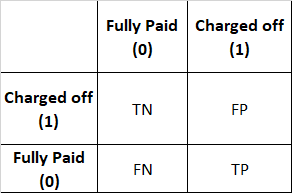

Which metrics we should select for our model will depend on the Business use case

Case 1 - When the bank does not want to lose the money as well as the customers. we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more supply chains and earn interest on it.

- In case of low recall, Lending Club loan might lose money. Low precision means even if the borrower is not a defaulter or charged off, he will not be approved for a loan. That means lost business for the banks. It is important to have a balance between recall and precision, so a good F1-score will make sure that balance is maintained.

Case 2 - The bank does not want to lose the money but can grow slowly with genuine customers. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone with NPA.

- In this case, when predicting whether or not a loan will default - it would be better to have a high recall because the banks don't want to lose money, so it would be a good idea to alert the bank even if there is a slight doubt about the borrower.Low precision, in this case, might be okay.

Case 3: When a bank wants to grow faster and get more customers at the expense of losing some money in some cases.

- In this case, it would be ok to have a slight higher precision compare the recall.

Comparison between Model 3 & Model 2

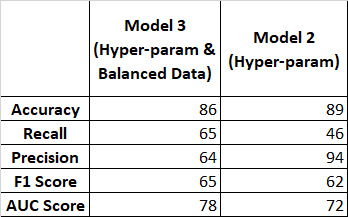

Inferences

- From the above metrics it is clearly shows Model 3 is much better than Model 2 as balance between recall and precision is maintained.
- A low recall or precision (one or both inputs) makes the F1-score more sensitive, which is great if you want to balance the two.The higher the F1-score the better the model for case 1
- Model 3 has F1-score as 65 where as Model 2 has F-score as 62only.
- Moreover, we can clearly see that recall is very high for models with balanced data. In our case it it Model 3.

# Inferences and Recommendations

Inferences Based on EDA:

- Eighty-five percent of loan balances are fully paid, while 19 percent have been charged off
- There is a strong correlation between loan amount and installment (with 0.95)
- Mortgages are the most common form of home ownership
- 94% of people who have grades 'A' pay their loans on time.
- The two top job titles that take most loans are teacher and manager.
- zip codes 11650,86630, and 93700 have a 100% probability of getting charged-off. Location plays imprtant role for loan getting charged-off.

Inferences based on the modlel:

- From the above metrics it is clearly shows Model 3 is much better than Model 2 as balance between recall and precision is maintained.
- A low recall or precision (one or both inputs) makes the F1-score more sensitive, which is great if you want to balance the two.The higher the F1-score the better the model for case 1
- Model 3 has F1-score as 65 where as Model 2 has F-score as 62only.
- Moreover, we can clearly see that recall is very high for models with balanced data. In our case it it Model 3.

Recommendations:

- Model 3 is recommended as it can detect real defaulters and ensure that the bank will not lose the opportunity to finance more supply chains and earn interest.
- One way to make sure we have fewer defaulters is to get customers with high grades.
- zip codes 11650,86630, and 93700 have a 100% probability of getting charged-off. Banks should refrain from lending to these areas until they understand why. As well, setup a team to analyze, as this is a common trend for getting charged-off at those locations.
- Key features that heavily affected the outcome are - dti, mort_acc, verification_status, sub_grade & int_rate